In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import math

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
barcelona = pd.read_csv('/Users/jyots/Desktop/DSI-SF-4-Jyojha/Capstone_Project/airbnb_DataSets/Airbnb listings in Barcelona (November 2015).csv',
                   encoding='utf8')

In [4]:
barcelona.drop('borough', axis=1, inplace=True)

In [5]:
barcelona.neighborhood.replace(u'Sant Mart\ufffd',u'Sant Marti',inplace=True)
barcelona.neighborhood.replace(u'Horta-Guinard\ufffd',u'Horta-Guinardo',inplace=True)
barcelona.neighborhood.replace(u'Gr\ufffdcia',u'Gracia',inplace=True)
barcelona.neighborhood.replace(u'Sants-Montju\ufffdc',u'Sants-Montjuic',inplace=True)
barcelona.neighborhood.replace(u'Sarri\ufffd-Sant Gervasi',u'Sarria-Sant Gervasi',inplace=True)

In [6]:
barcelona = barcelona[barcelona['room_type'].notnull()]

In [7]:
barcelona

,Unnamed: 0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,0,7670,20617,Entire home/apt,Ciutat Vella,119,4.5,2.0,NaN,NaN,55.0,2.0,41.386942,2.183842,2015-11-13 18:58:48.009865
1,1,11194,41161,Private room,Ciutat Vella,63,4.5,2.0,1.0,NaN,39.0,2.0,41.383905,2.181047,2015-11-13 14:04:57.539955
2,2,11318,38836,Entire home/apt,Ciutat Vella,14,4.5,3.0,2.0,1.0,44.0,30.0,41.387442,2.177791,2015-11-06 04:11:11.538389
3,3,11368,42188,Entire home/apt,Ciutat Vella,20,4.5,4.0,1.0,1.0,96.0,2.0,41.387507,2.178608,2015-11-06 05:39:08.987623
4,4,15090,59369,Entire home/apt,Ciutat Vella,114,4.0,NaN,1.0,1.0,84.0,2.0,41.383706,2.181556,2015-11-06 20:16:37.462965
5,5,18477,71164,Entire home/apt,Eixample,64,5.0,4.0,2.0,1.0,35.0,30.0,41.377683,2.154875,2015-11-06 13:13:35.452722
6,6,18653,71615,Entire home/apt,Eixample,0,NaN,NaN,2.0,1.0,124.0,2.0,41.409215,2.173868,2015-11-14 07:39:14.714112
7,7,18666,71615,Entire home/apt,Sant Marti,1,4.0,NaN,2.0,1.0,104.0,NaN,41.408886,2.185545,2015-11-06 17:48:09.717031
8,8,18674,71615,Entire home/apt,Eixample,3,5.0,NaN,3.0,2.0,106.0,NaN,41.404197,2.173058,2015-11-06 19:21:50.672898
9,9,19157,73099,Private room,Eixample,91,4.5,2.0,1.0,1.0,33.0,2.0,41.407929,2.174540,2015-11-14 13:12:52.769208


In [8]:
barcelona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14004 entries, 0 to 14011
Data columns (total 15 columns):
Unnamed: 0              14004 non-null int64
room_id                 14004 non-null int64
host_id                 14004 non-null int64
room_type               14004 non-null object
neighborhood            14004 non-null object
reviews                 14004 non-null int64
overall_satisfaction    11306 non-null float64
accommodates            11330 non-null float64
bedrooms                13981 non-null float64
bathrooms               12875 non-null float64
price                   14004 non-null float64
minstay                 12961 non-null float64
latitude                14004 non-null float64
longitude               14004 non-null float64
collected               14004 non-null object
dtypes: float64(8), int64(4), object(3)
memory usage: 1.7+ MB


In [9]:
barcelona.bedrooms.unique()

array([ nan,   1.,   2.,   3.,   4.,   5.,   0.,   6.,   7.,   8.,   9.,
        10.])

In [10]:
barcelona.neighborhood.unique()

array([u'Ciutat Vella', u'Eixample', u'Sant Marti', u'Nou Barris',
       u'Horta-Guinardo', u'Gracia', u'Sants-Montjuic', u'Sant Andreu',
       u'Sarria-Sant Gervasi', u'Les Corts'], dtype=object)

In [11]:
barcelona = barcelona[barcelona['bedrooms'].notnull()]

In [12]:
# We have removed the rows that had "0" bathrooms. We are assuming every house comes with atleast 1 bathroom.
barcelona = barcelona[barcelona['bathrooms'] != 0.]

In [13]:
barcelona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13900 entries, 1 to 14011
Data columns (total 15 columns):
Unnamed: 0              13900 non-null int64
room_id                 13900 non-null int64
host_id                 13900 non-null int64
room_type               13900 non-null object
neighborhood            13900 non-null object
reviews                 13900 non-null int64
overall_satisfaction    11225 non-null float64
accommodates            11248 non-null float64
bedrooms                13900 non-null float64
bathrooms               12774 non-null float64
price                   13900 non-null float64
minstay                 12860 non-null float64
latitude                13900 non-null float64
longitude               13900 non-null float64
collected               13900 non-null object
dtypes: float64(8), int64(4), object(3)
memory usage: 1.7+ MB


In [14]:
bc = barcelona[['bedrooms','bathrooms']]

In [15]:
bc.sort_values('bedrooms', inplace=True)

/Users/Jyots/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
bc.head(2)

,bedrooms,bathrooms
5773,0.0,1.0
4522,0.0,1.0


In [17]:
barcelona.sort_values('bedrooms', inplace=True)

In [18]:
barcelona = barcelona.reset_index()

In [19]:
barcelona.head(2)

,index,Unnamed: 0,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,5773,5773,3359293,16327131,Entire home/apt,Ciutat Vella,27,4.0,3.0,0.0,1.0,67.0,2.0,41.388655,2.178852,2015-11-06 21:37:47.659825
1,4522,4522,2524664,7274463,Entire home/apt,Ciutat Vella,62,4.5,4.0,0.0,1.0,101.0,3.0,41.380967,2.168394,2015-11-06 04:24:20.079460


In [20]:
barcelona.drop(['index','Unnamed: 0'], axis=1, inplace=True)

In [21]:
barcelona.head(2)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,collected
0,3359293,16327131,Entire home/apt,Ciutat Vella,27,4.0,3.0,0.0,1.0,67.0,2.0,41.388655,2.178852,2015-11-06 21:37:47.659825
1,2524664,7274463,Entire home/apt,Ciutat Vella,62,4.5,4.0,0.0,1.0,101.0,3.0,41.380967,2.168394,2015-11-06 04:24:20.079460


In [22]:
#barcelona['bathrooms'][barcelona['bedrooms']==4]

In [23]:
# Imputation for Bathrooms
barcelona.bathrooms.fillna(method='bfill',inplace=True)


In [35]:
#barcelona.info()

In [40]:
barcelona['overall_satisfaction'].isnull().sum()

0

In [29]:
#barcelona['reviews'].value_counts()

In [32]:
# maximum number of reviews for a place where satisfaction level is null is 6(very small), we impute the 
# satisfaction level with a score of 2.
barcelona['reviews'][barcelona['overall_satisfaction'].isnull()].value_counts()

0    2559
1      97
2      16
3       2
6       1
Name: reviews, dtype: int64

In [34]:
# Imputation for overall satisfaction
barcelona.overall_satisfaction.fillna(value =2. ,inplace=True)


In [37]:
#barcelona.info()

In [38]:
barcelona.to_csv(path_or_buf='/Users/jyots/Desktop/DS_Projects/airbnb_datasets/Barcelona_Clean.csv')

In [606]:
#barcelona.bathrooms[barcelona.bedrooms==3]

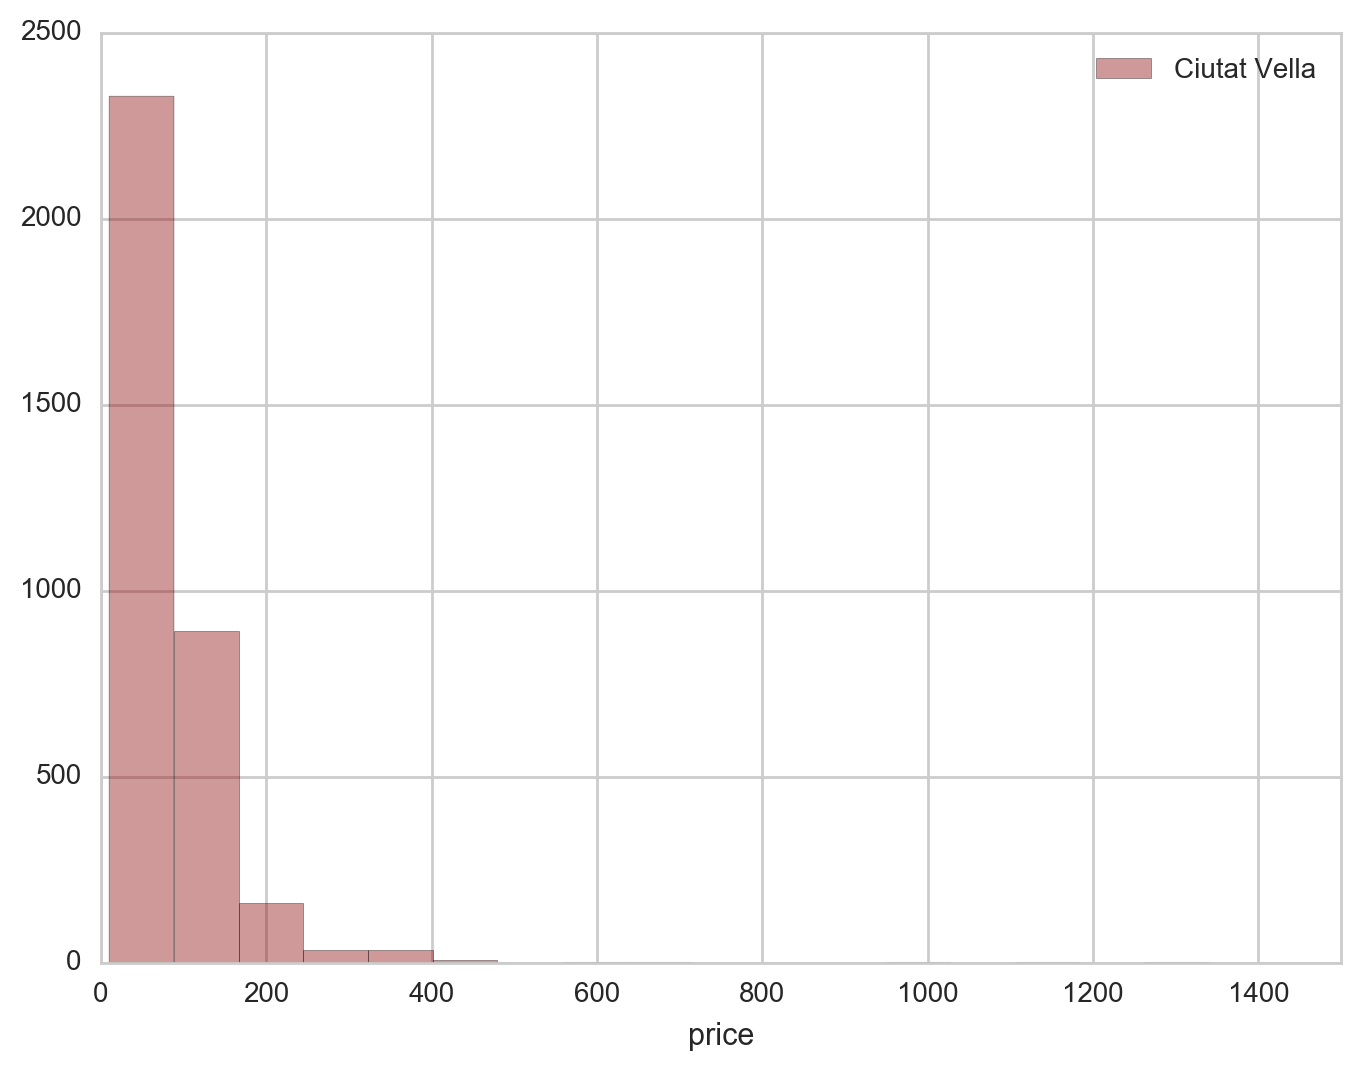

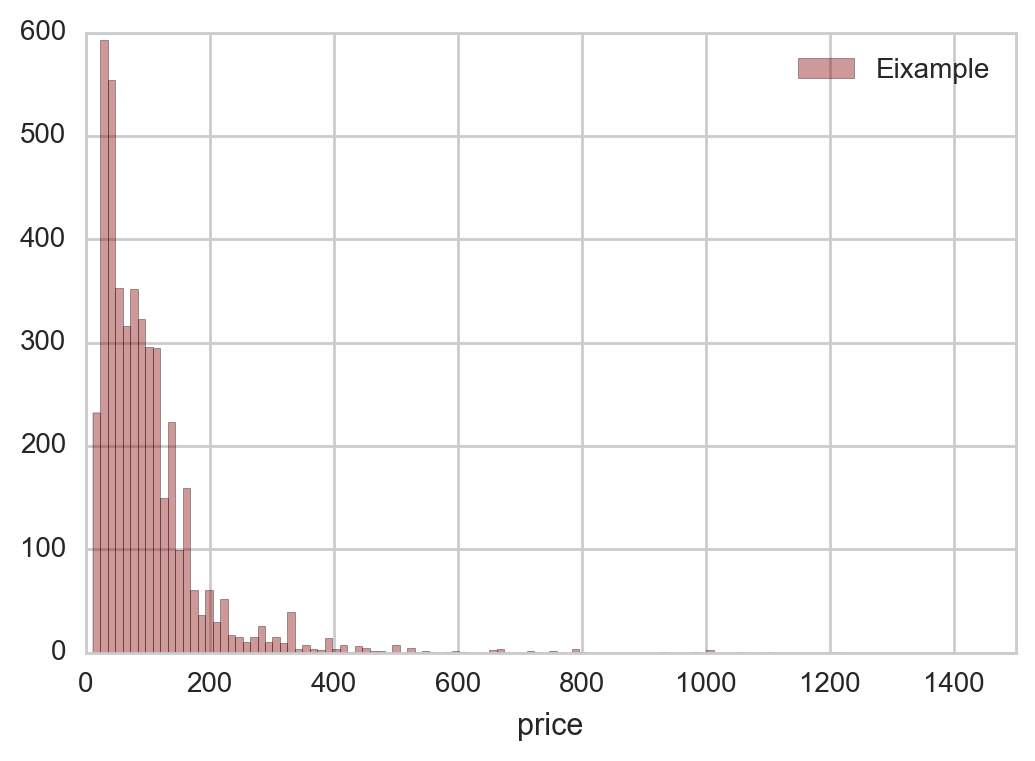

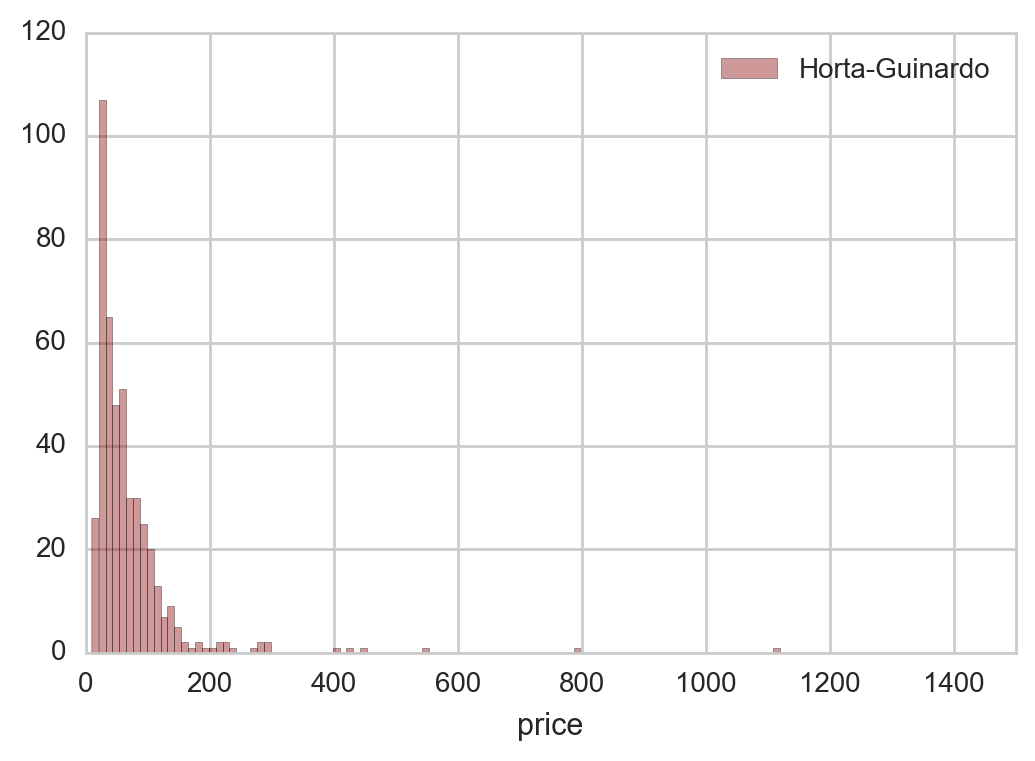

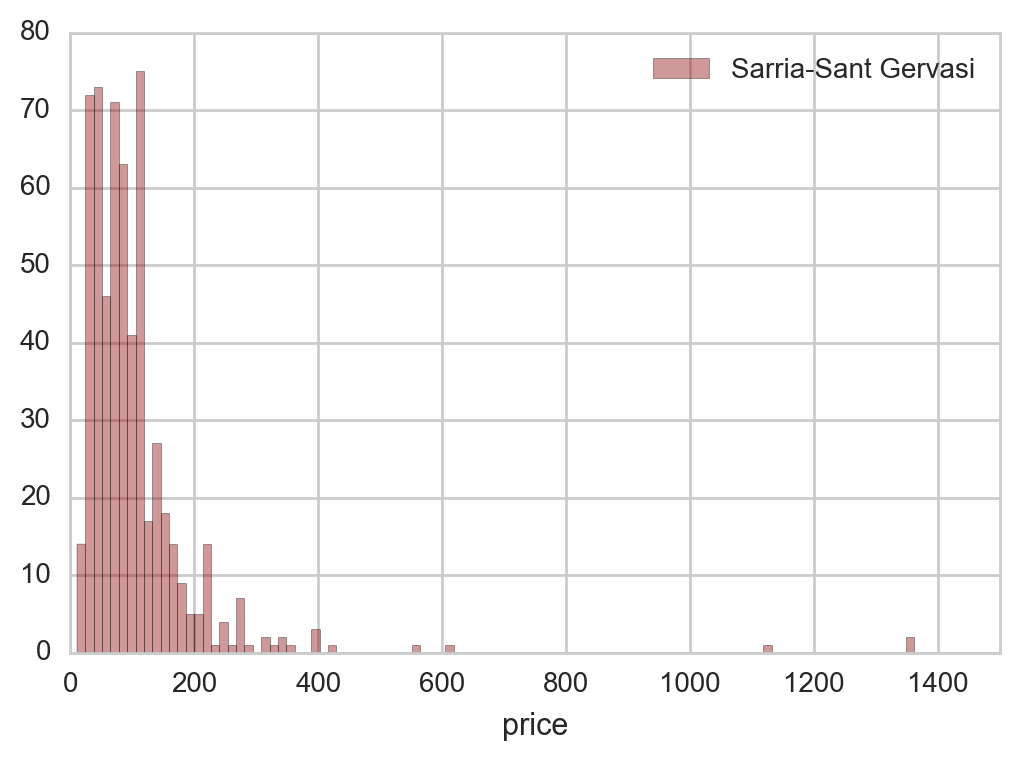

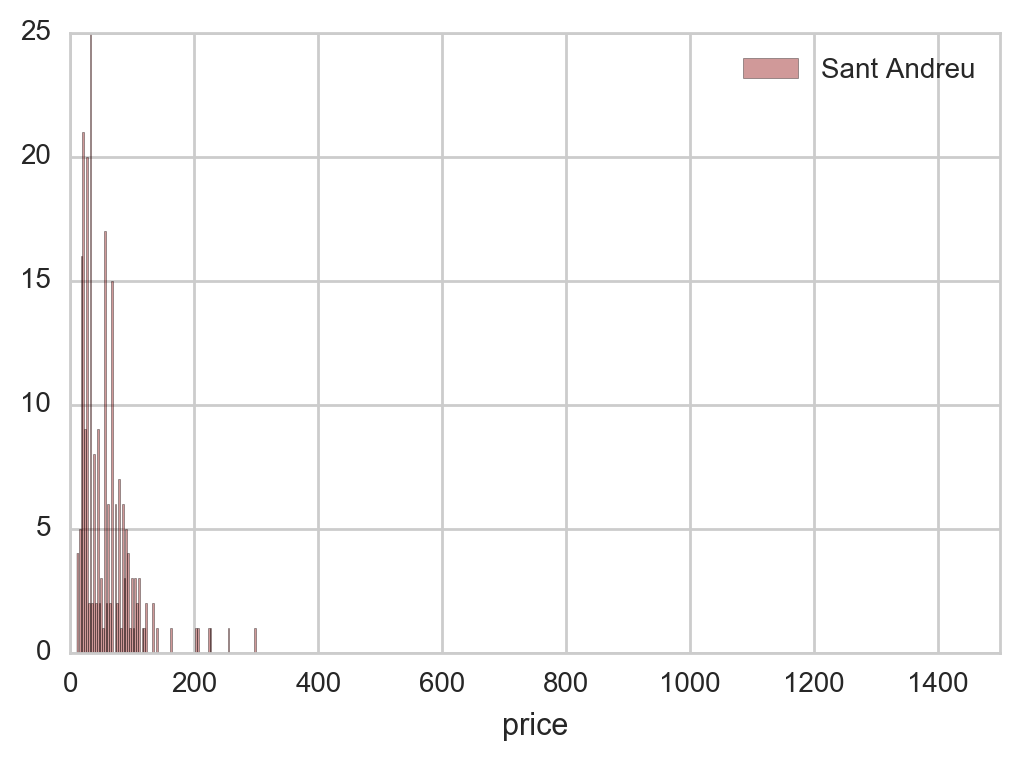

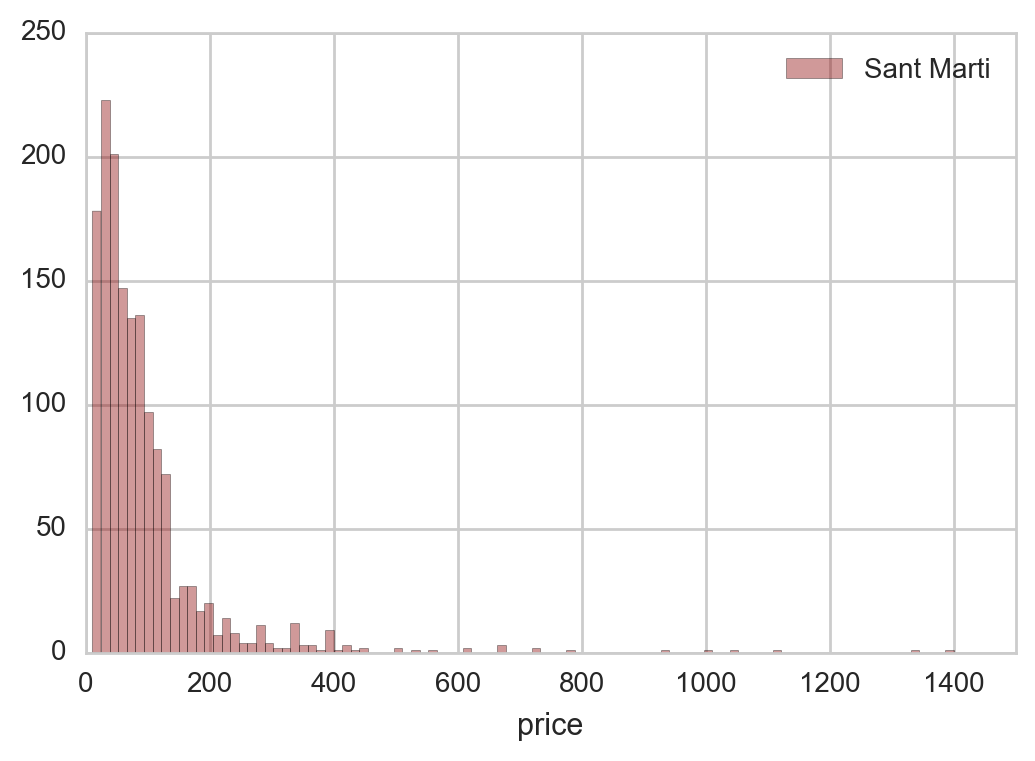

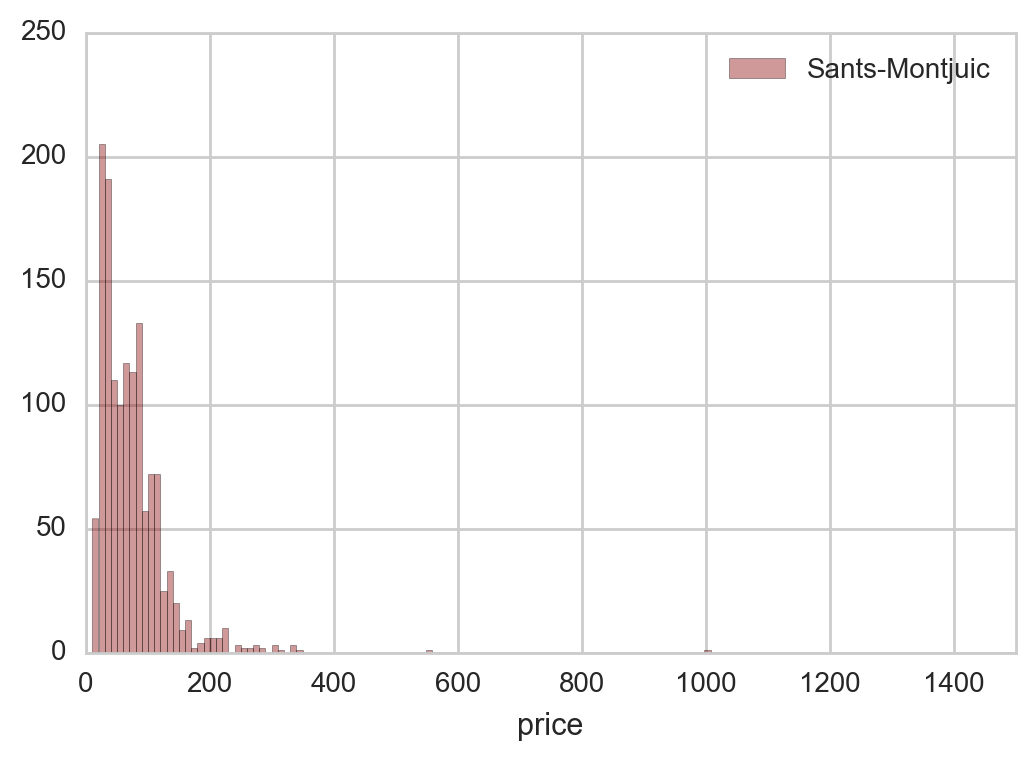

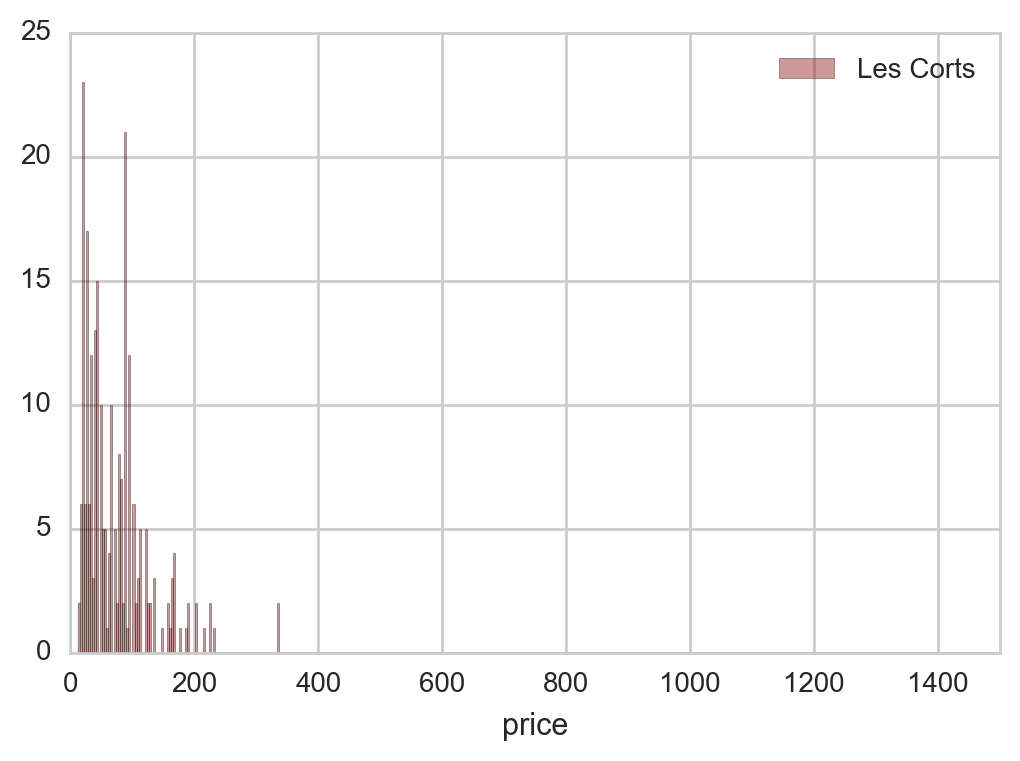

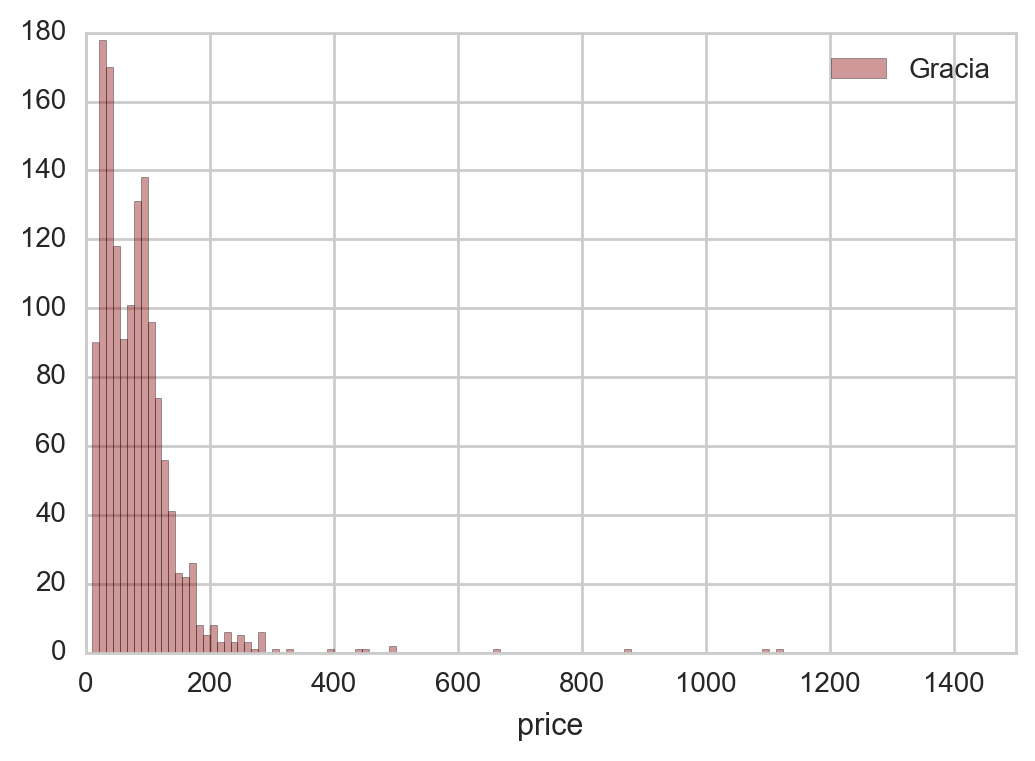

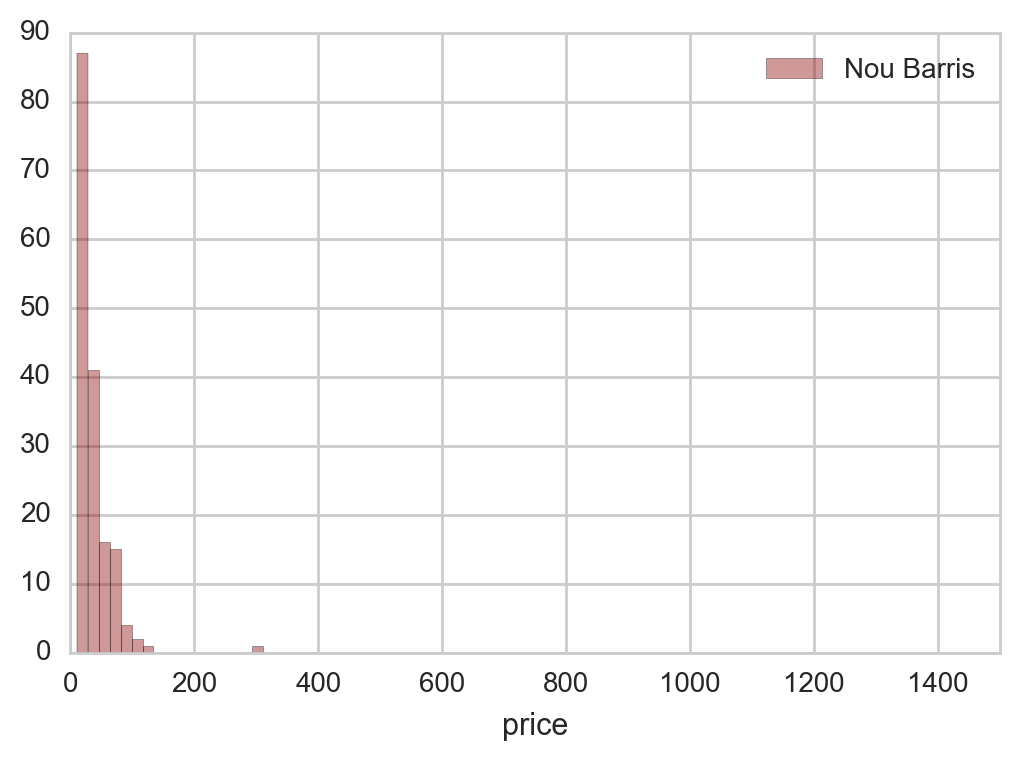

In [607]:
fig, ax = plt.subplots(figsize=(8,6))

for i in range(len(barcelona.neighborhood.unique())):
    bc = barcelona[barcelona.neighborhood == barcelona.neighborhood.unique()[i]]
    
    ax = sns.distplot(bc.price, color='darkred', bins=100, kde=False, 
                      label = barcelona.neighborhood.unique()[i])
                      
    ax.legend(loc='upper right')
    ax.set_xlim([0, 1500])
    plt.show()

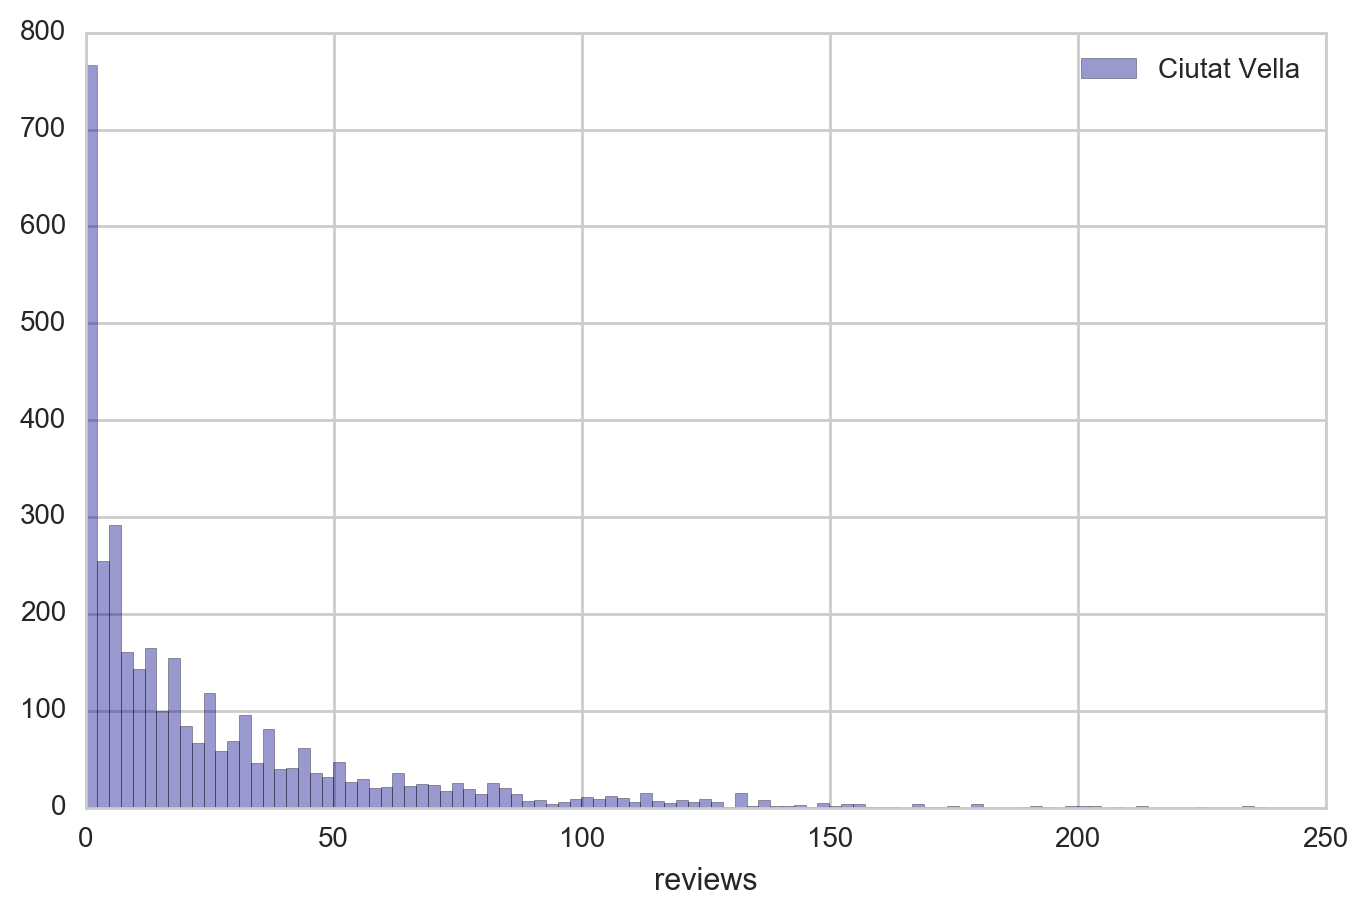

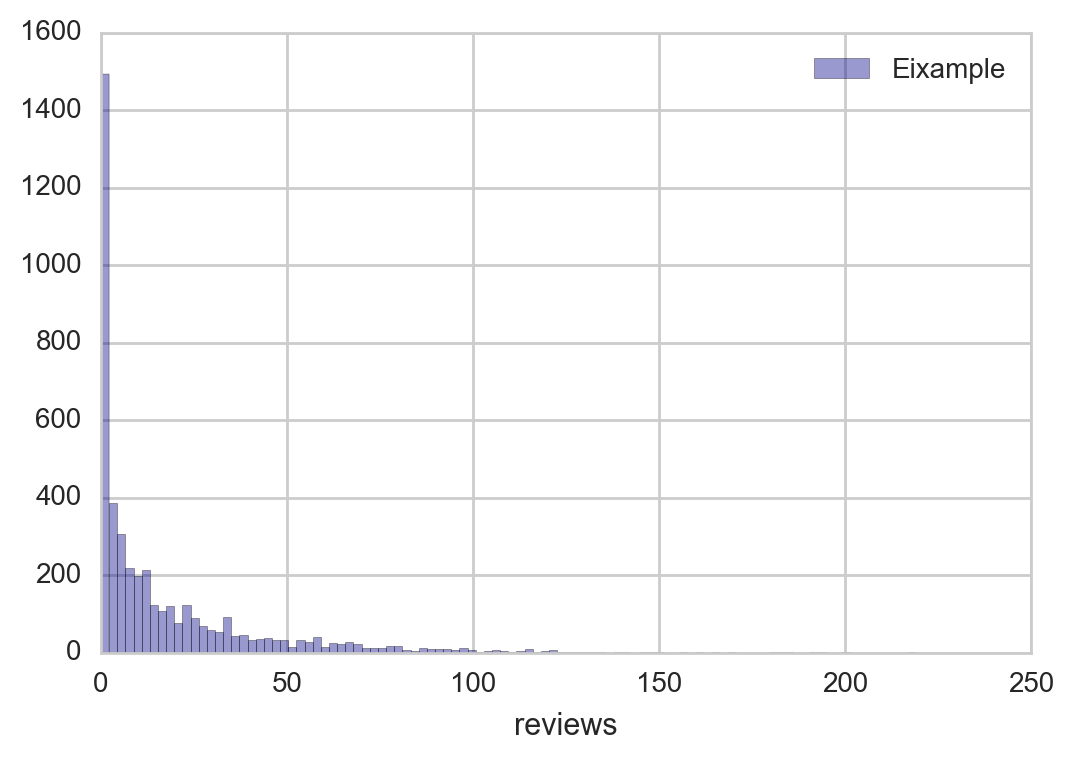

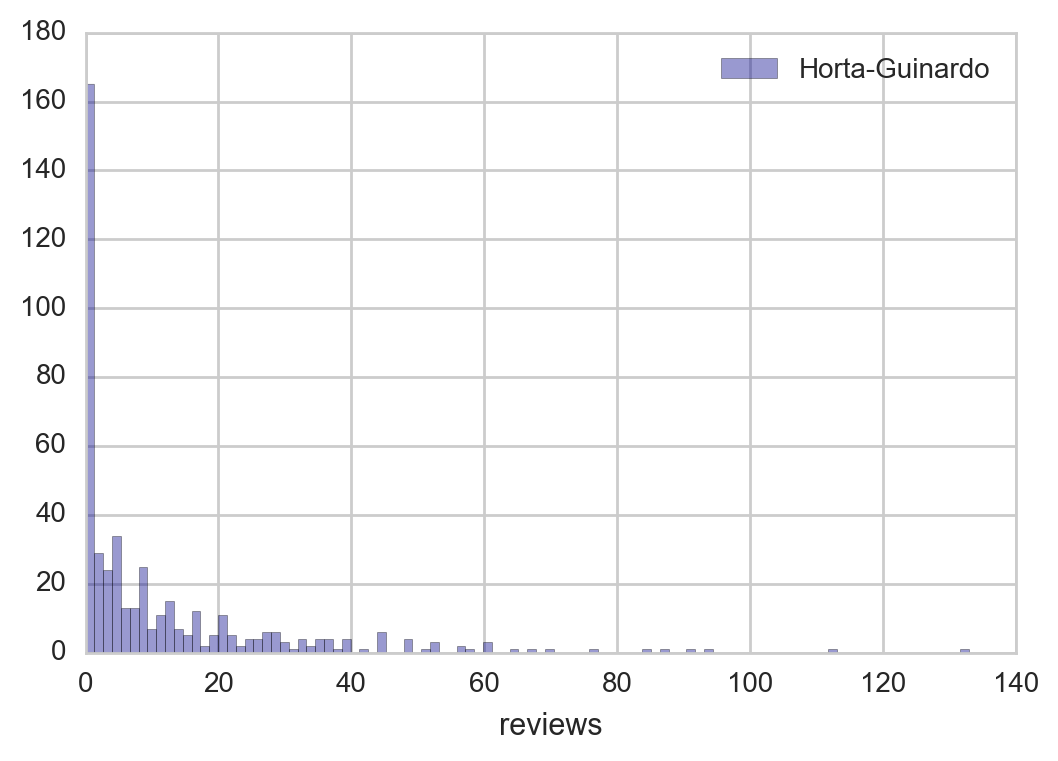

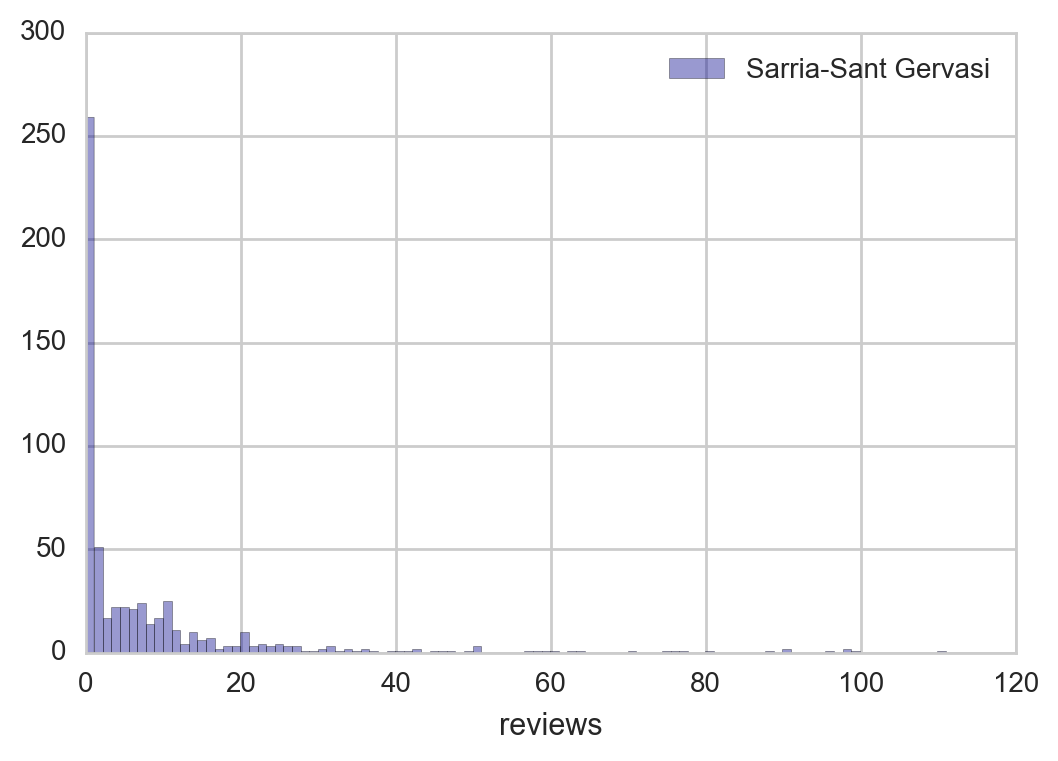

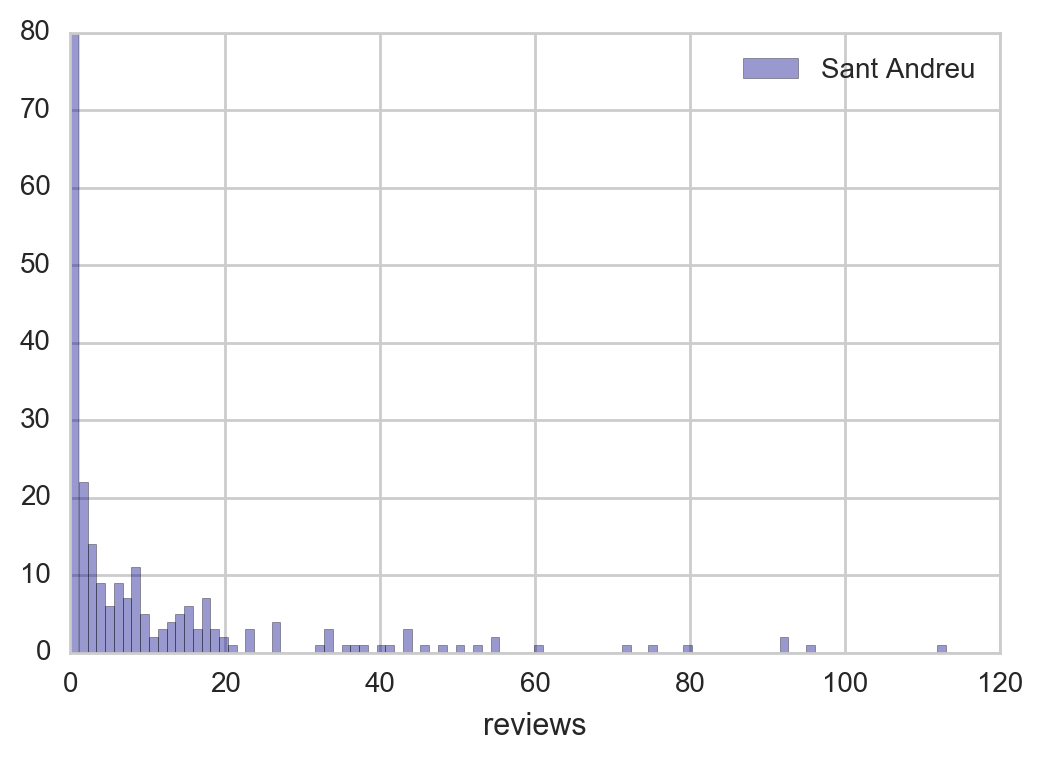

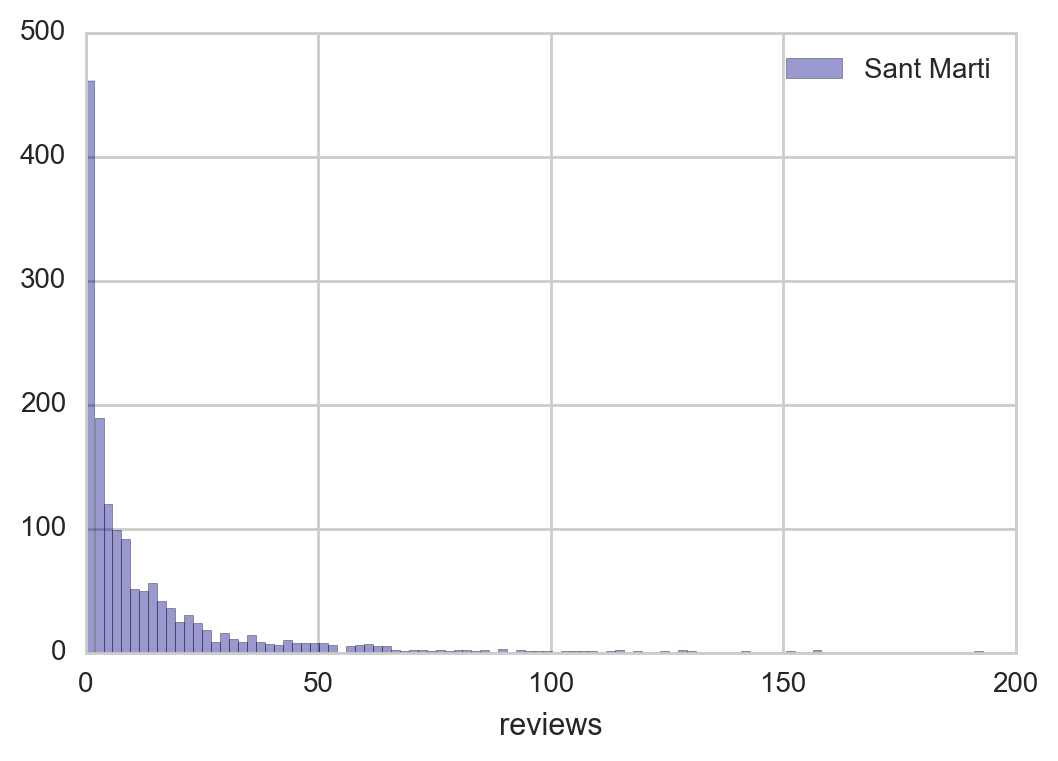

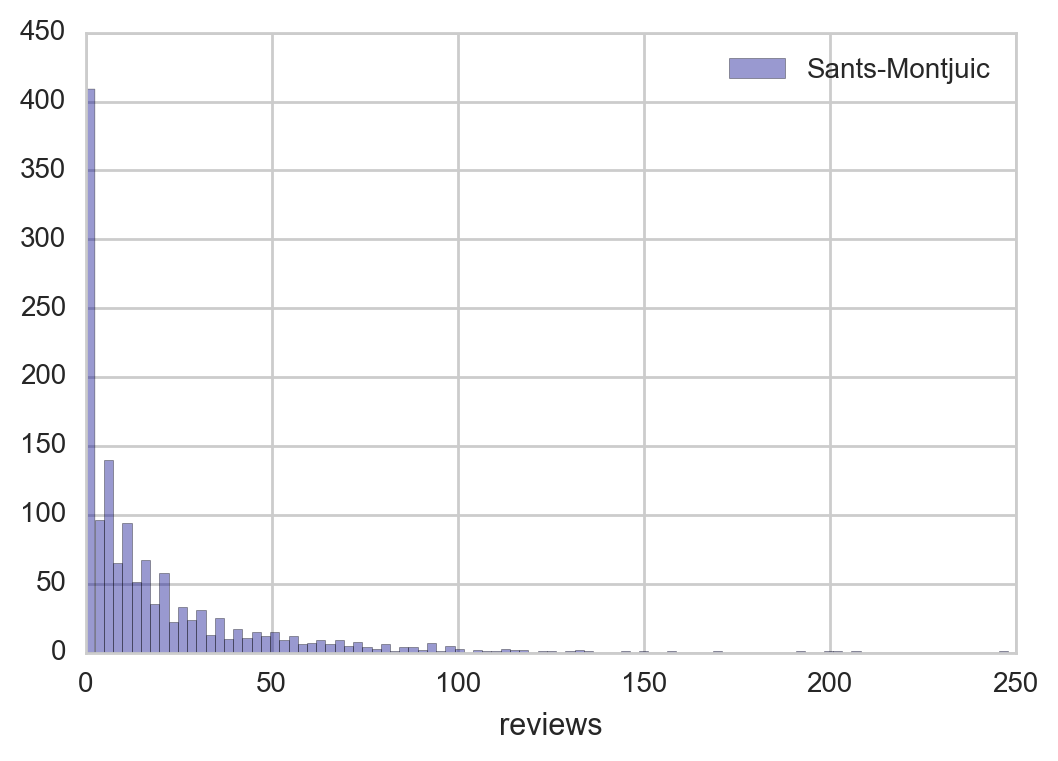

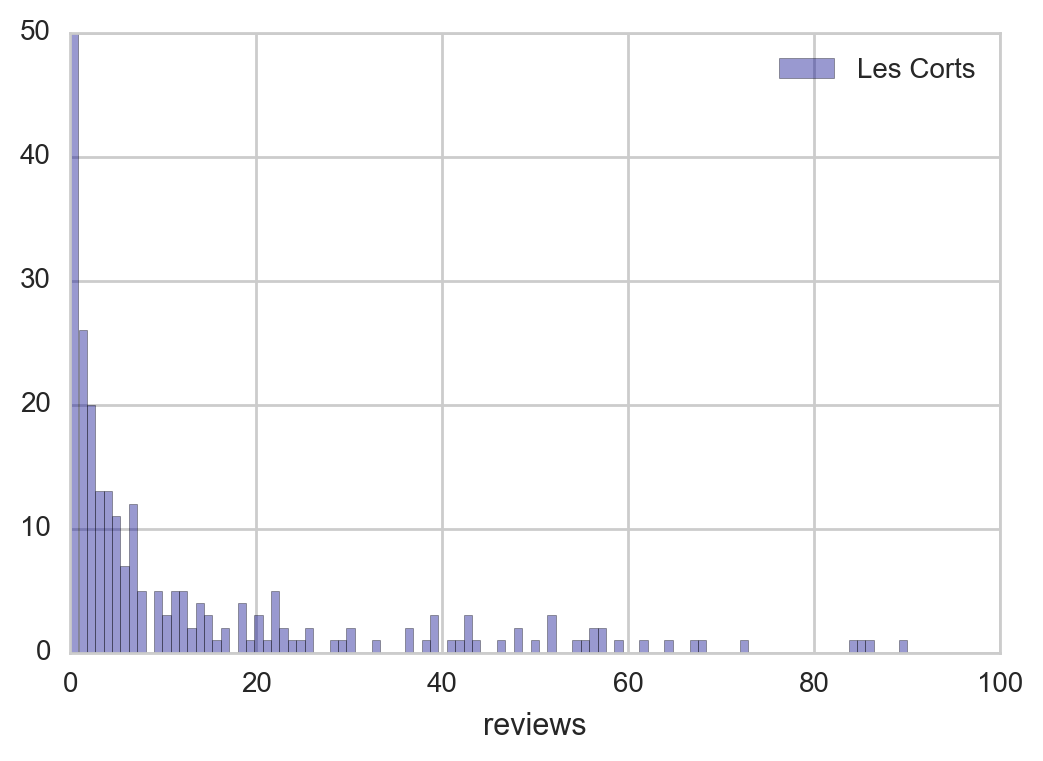

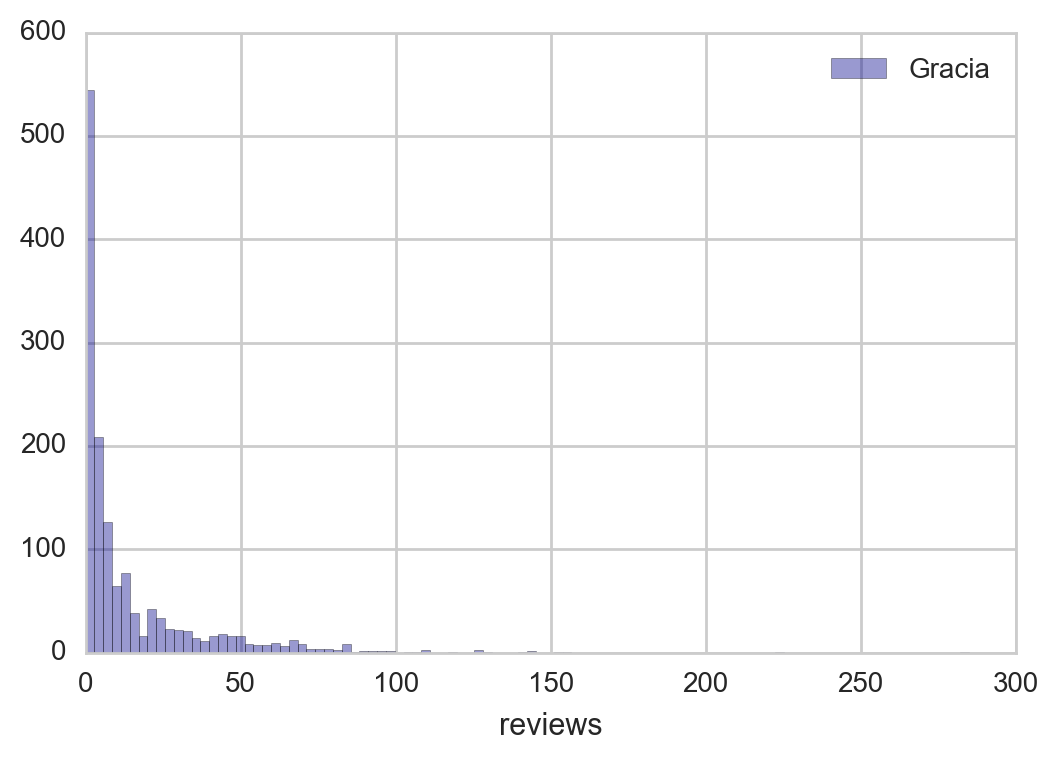

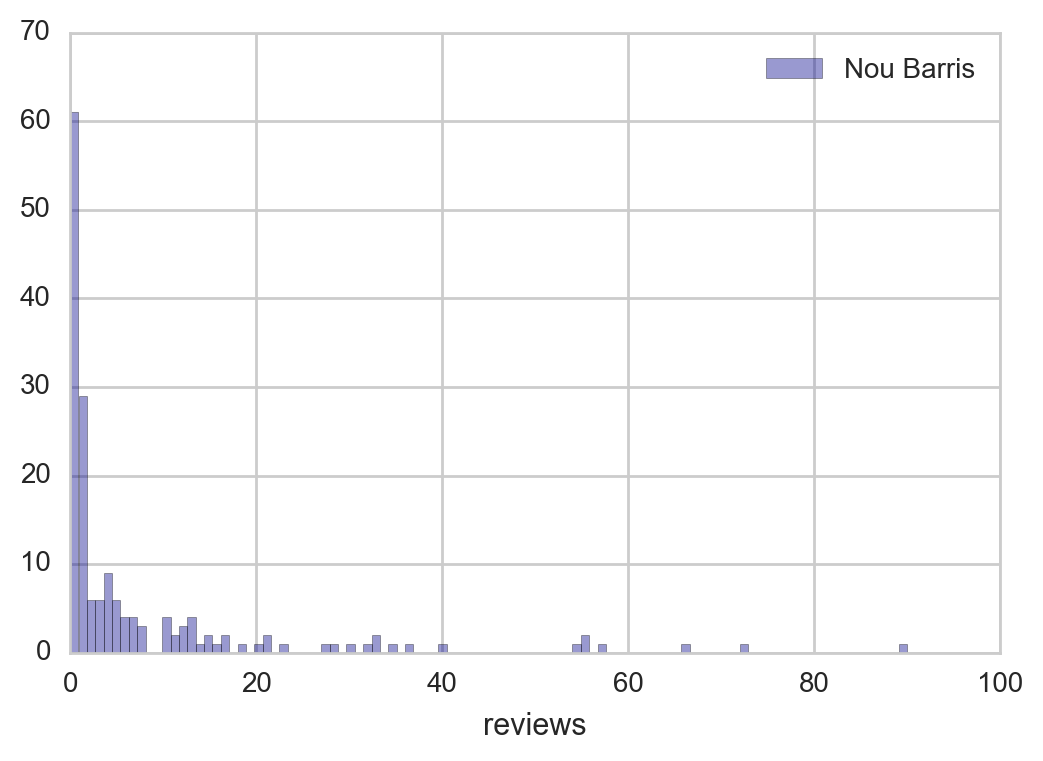

In [608]:
fig, ax = plt.subplots(figsize=(8,5))

for i in range(len(barcelona.neighborhood.unique())):
    bc = barcelona[barcelona.neighborhood == barcelona.neighborhood.unique()[i]]
    
    ax = sns.distplot(bc.reviews, color='darkblue', bins=100, kde=False, 
                      label = barcelona.neighborhood.unique()[i])
                      
    ax.legend(loc='upper right')
    #ax.set_xlim([0, 00])
    plt.show()

In [609]:
custom = lambda x: np.average(x)
df1 = pd.DataFrame(barcelona.groupby('neighborhood').agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [610]:
df1=df1.reset_index()

In [611]:
df1.sort_values('neighborhood', inplace = True)

In [612]:
df1 = df1.reset_index()

In [613]:
df1.head(2)

,index,neighborhood,reviews,host_id,price
0,0,Ciutat Vella,92635,3469,85.279043
1,1,Eixample,79152,4445,99.774128


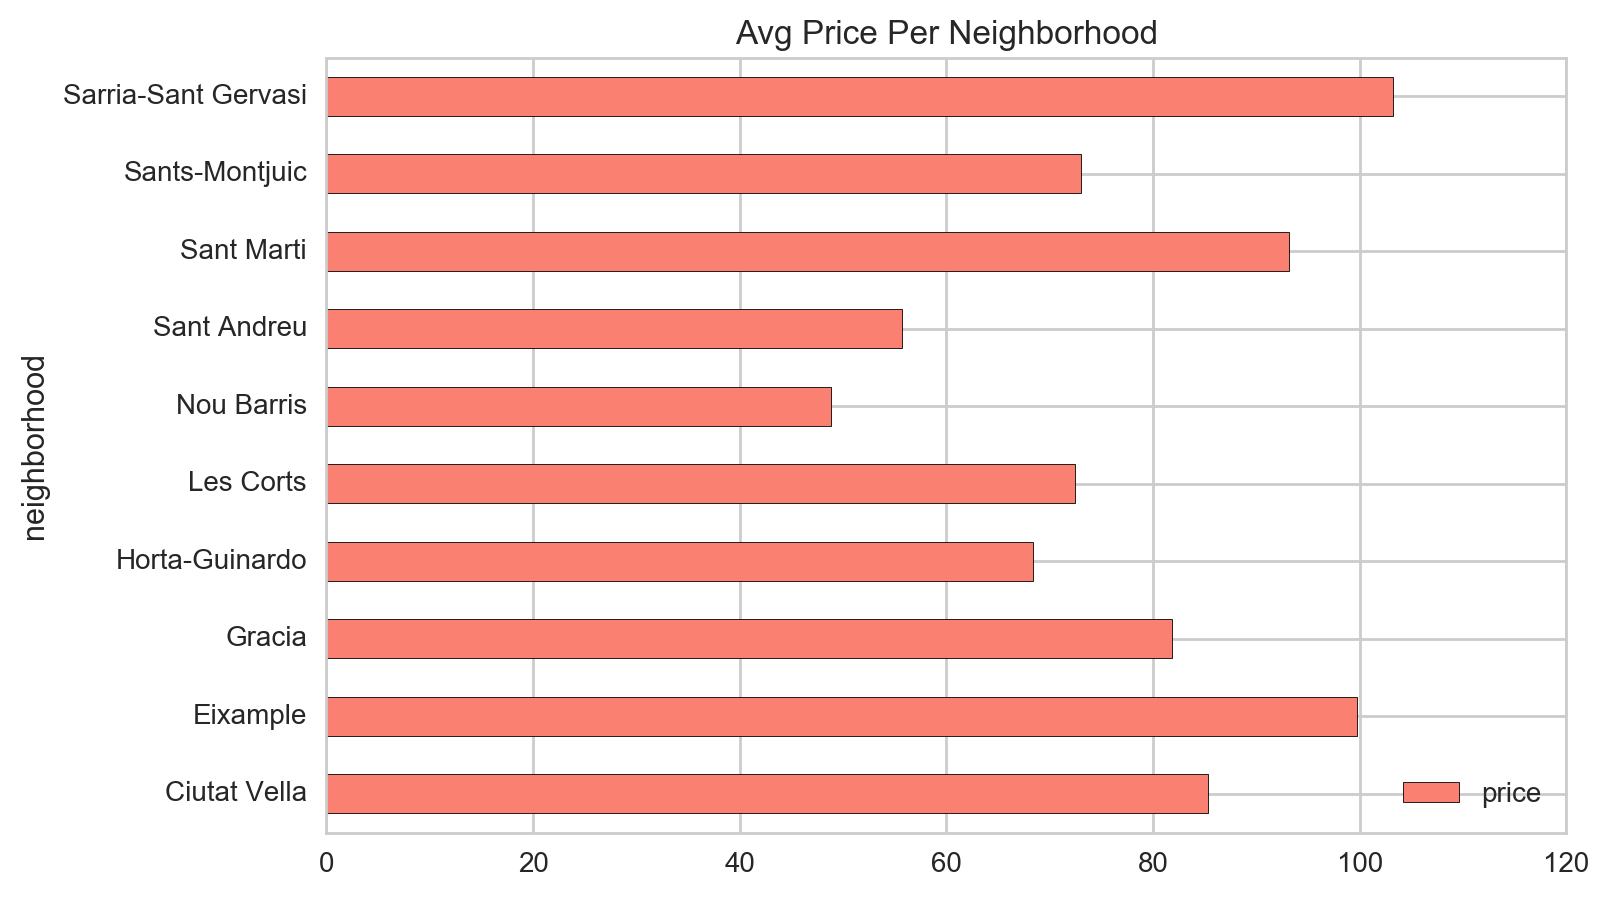

In [614]:
df1.plot(x='neighborhood', y='price', figsize=(8,5), kind = 'barh', title = 'Avg Price Per Neighborhood',
         color = 'salmon'
        )

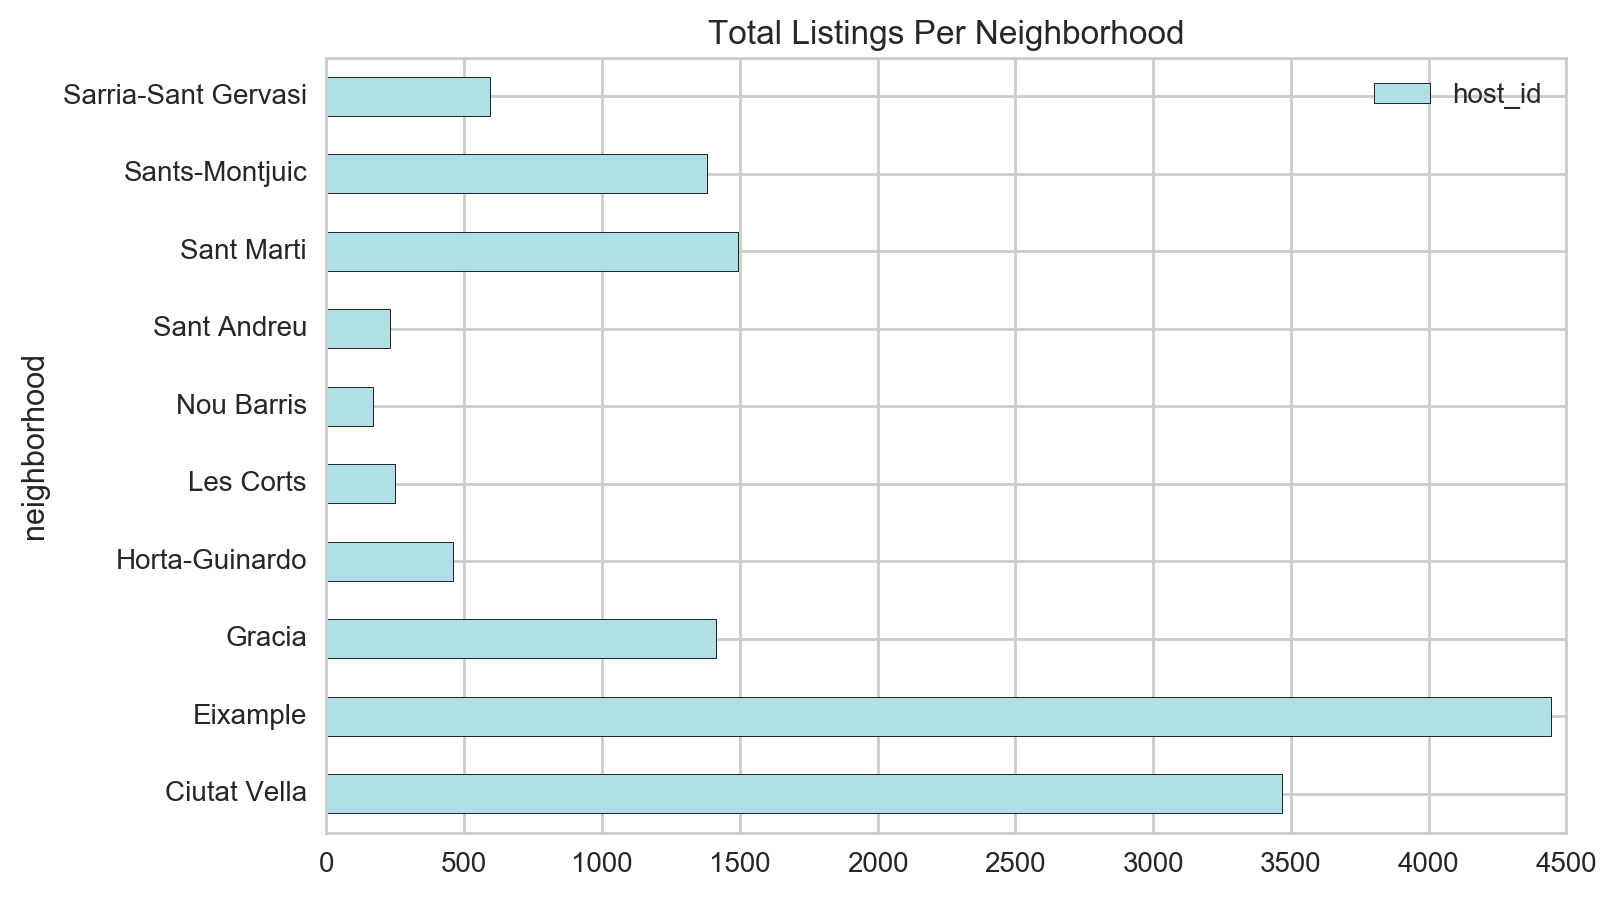

In [615]:
df1.plot(x='neighborhood', y='host_id', figsize=(8,5), kind = 'barh',title = 'Total Listings Per Neighborhood',
         color = 'powderblue')

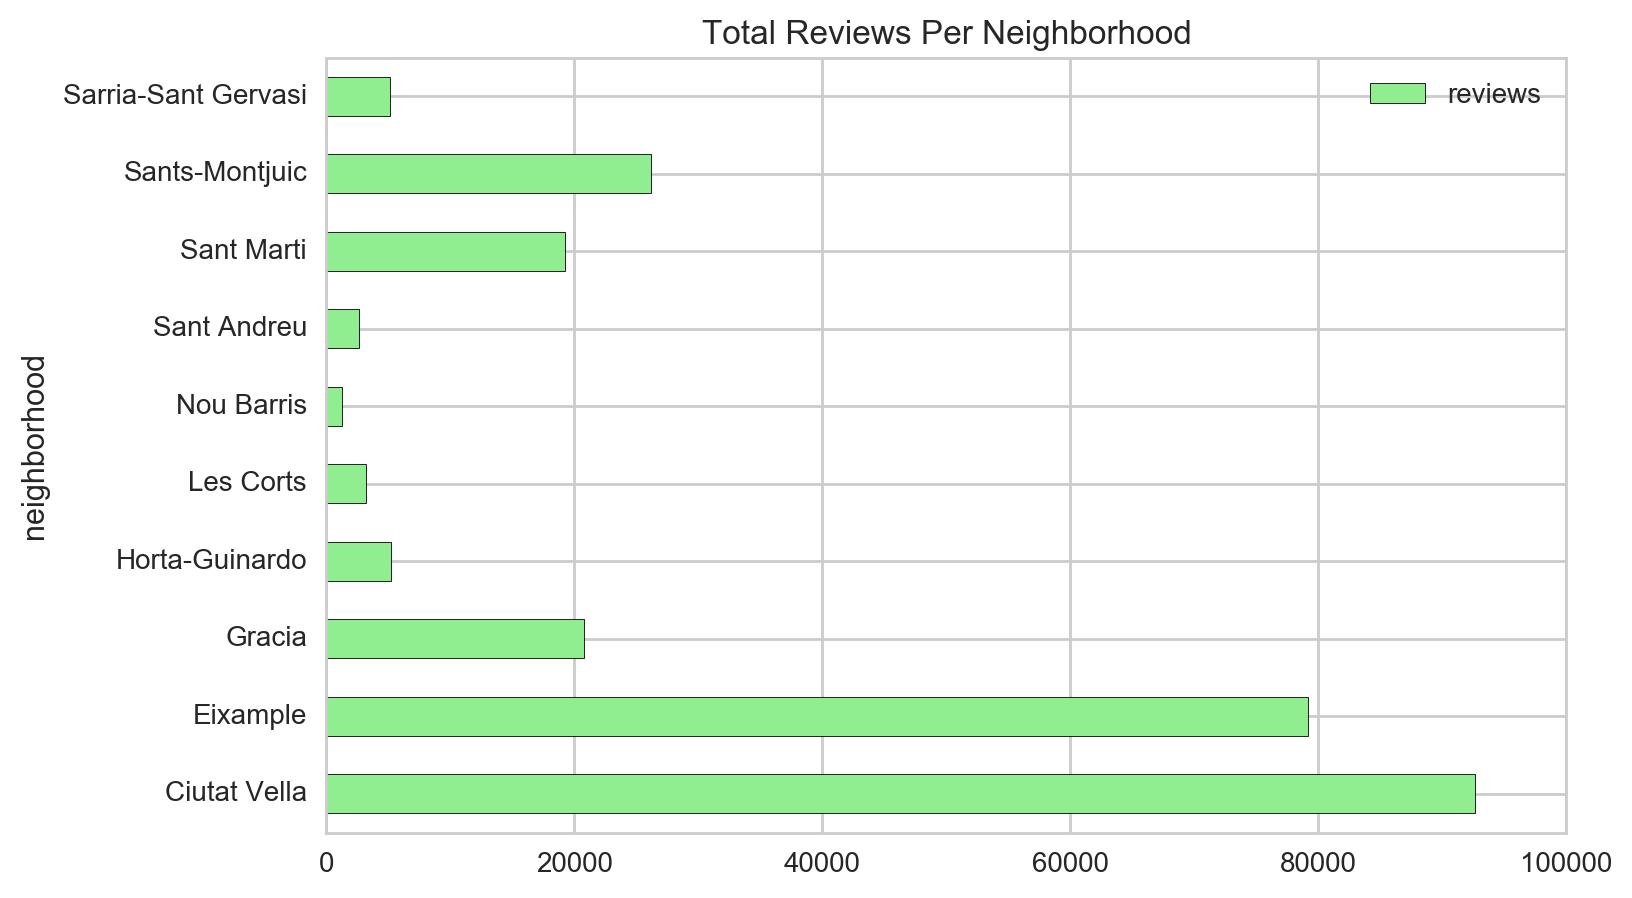

In [616]:
df1.plot(x='neighborhood', y='reviews', figsize=(8,5), kind = 'barh',title = 'Total Reviews Per Neighborhood',
        color='lightgreen')

In [617]:
custom = lambda x: np.average(x)
df2 = pd.DataFrame(barcelona.groupby(['neighborhood','room_type']).agg({'host_id':'count','reviews':'sum', 'price':custom}))

In [618]:
df2.reset_index(level=0, inplace=True)
df2.reset_index(inplace=True)

In [619]:
df2.head(2)

,room_type,neighborhood,reviews,host_id,price
0,Entire home/apt,Ciutat Vella,55597,2020,113.363861
1,Private room,Ciutat Vella,36938,1429,46.277117


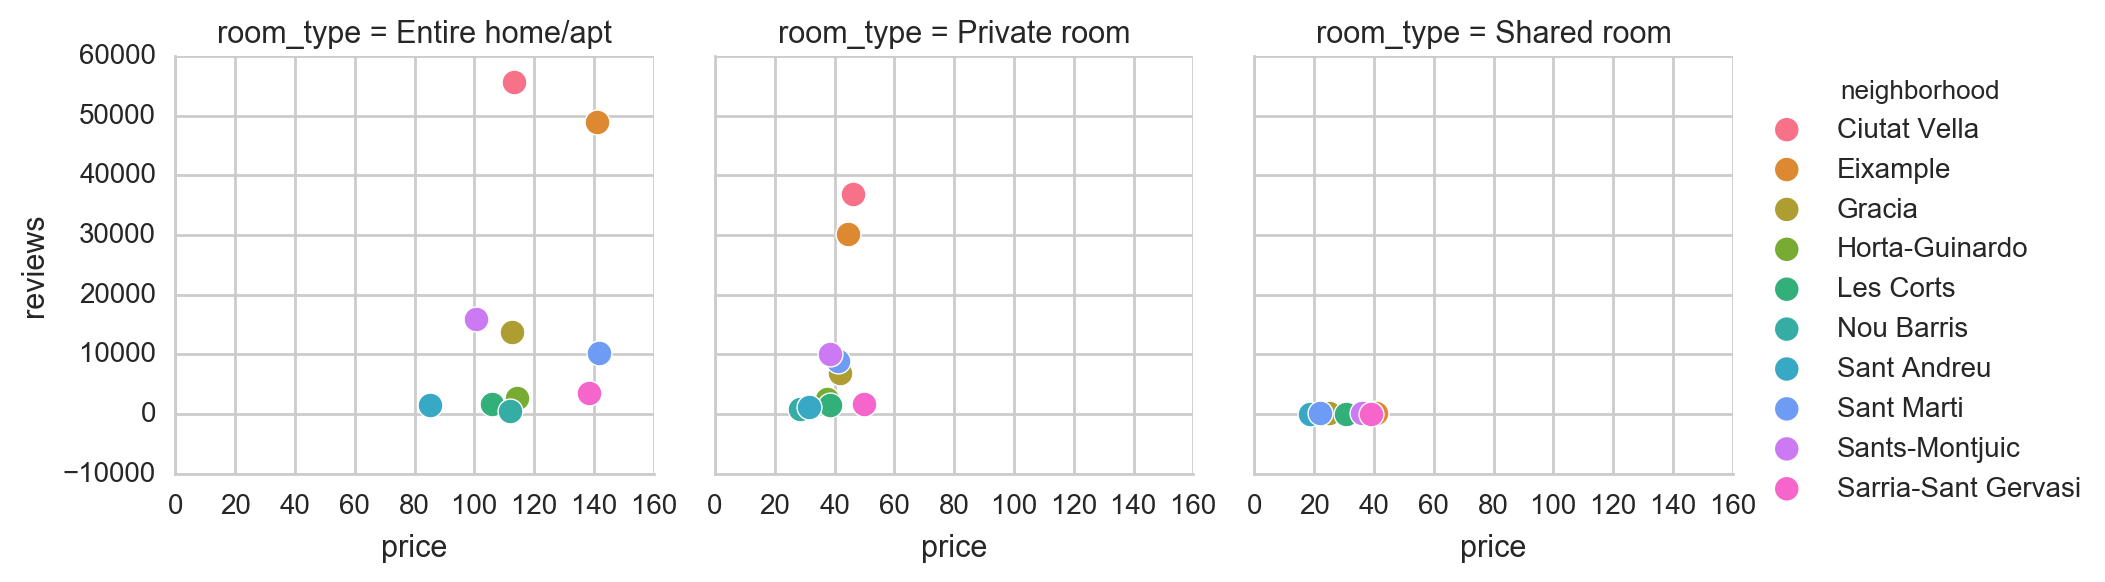

In [620]:
kws = dict(s=80, linewidth=.5)
g = sns.FacetGrid(df2, col="room_type", hue='neighborhood',size=3,)
g = (g.map(plt.scatter,"price","reviews", edgecolor="w", **kws).add_legend())

In [621]:
custom = lambda x: np.average(x)
df3 = pd.DataFrame(barcelona.groupby(['neighborhood','room_type','bedrooms']).agg({'bedrooms':'count','price':custom}))

In [622]:
df3.rename(columns={'bedrooms':'bedroom_count'}, inplace=True)

In [623]:
df3.reset_index(inplace=True)

In [624]:
df3.head(2)

,neighborhood,room_type,bedrooms,price,bedroom_count
0,Ciutat Vella,Entire home/apt,0.0,81.405556,180
1,Ciutat Vella,Entire home/apt,1.0,90.552846,861


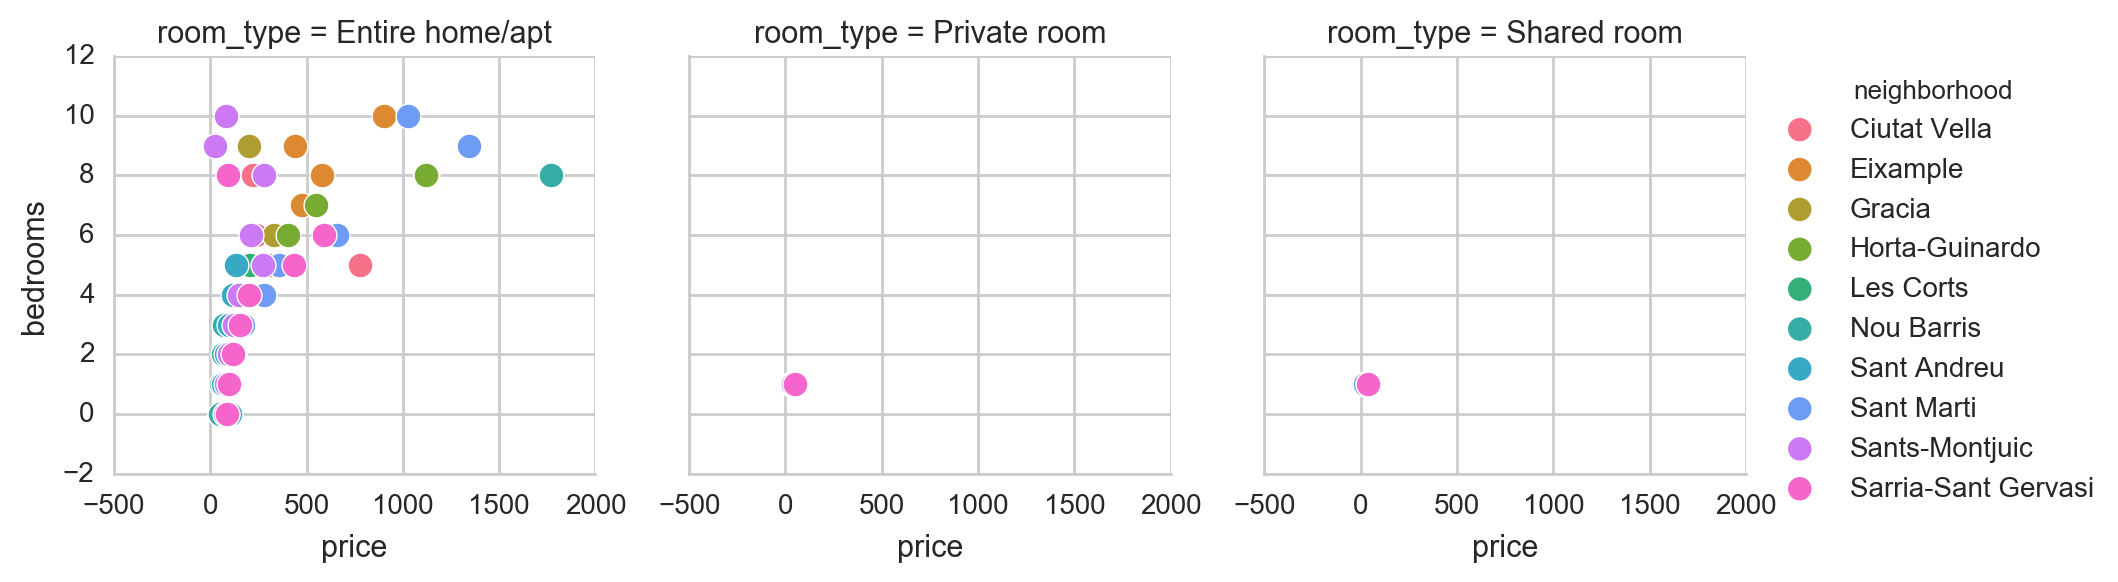

In [625]:
kws = dict(s=80, linewidth=.5)
g = sns.FacetGrid(df3, col="room_type", hue='neighborhood',size=3,)
g = (g.map(plt.scatter,"price","bedrooms", edgecolor="w", **kws).add_legend())

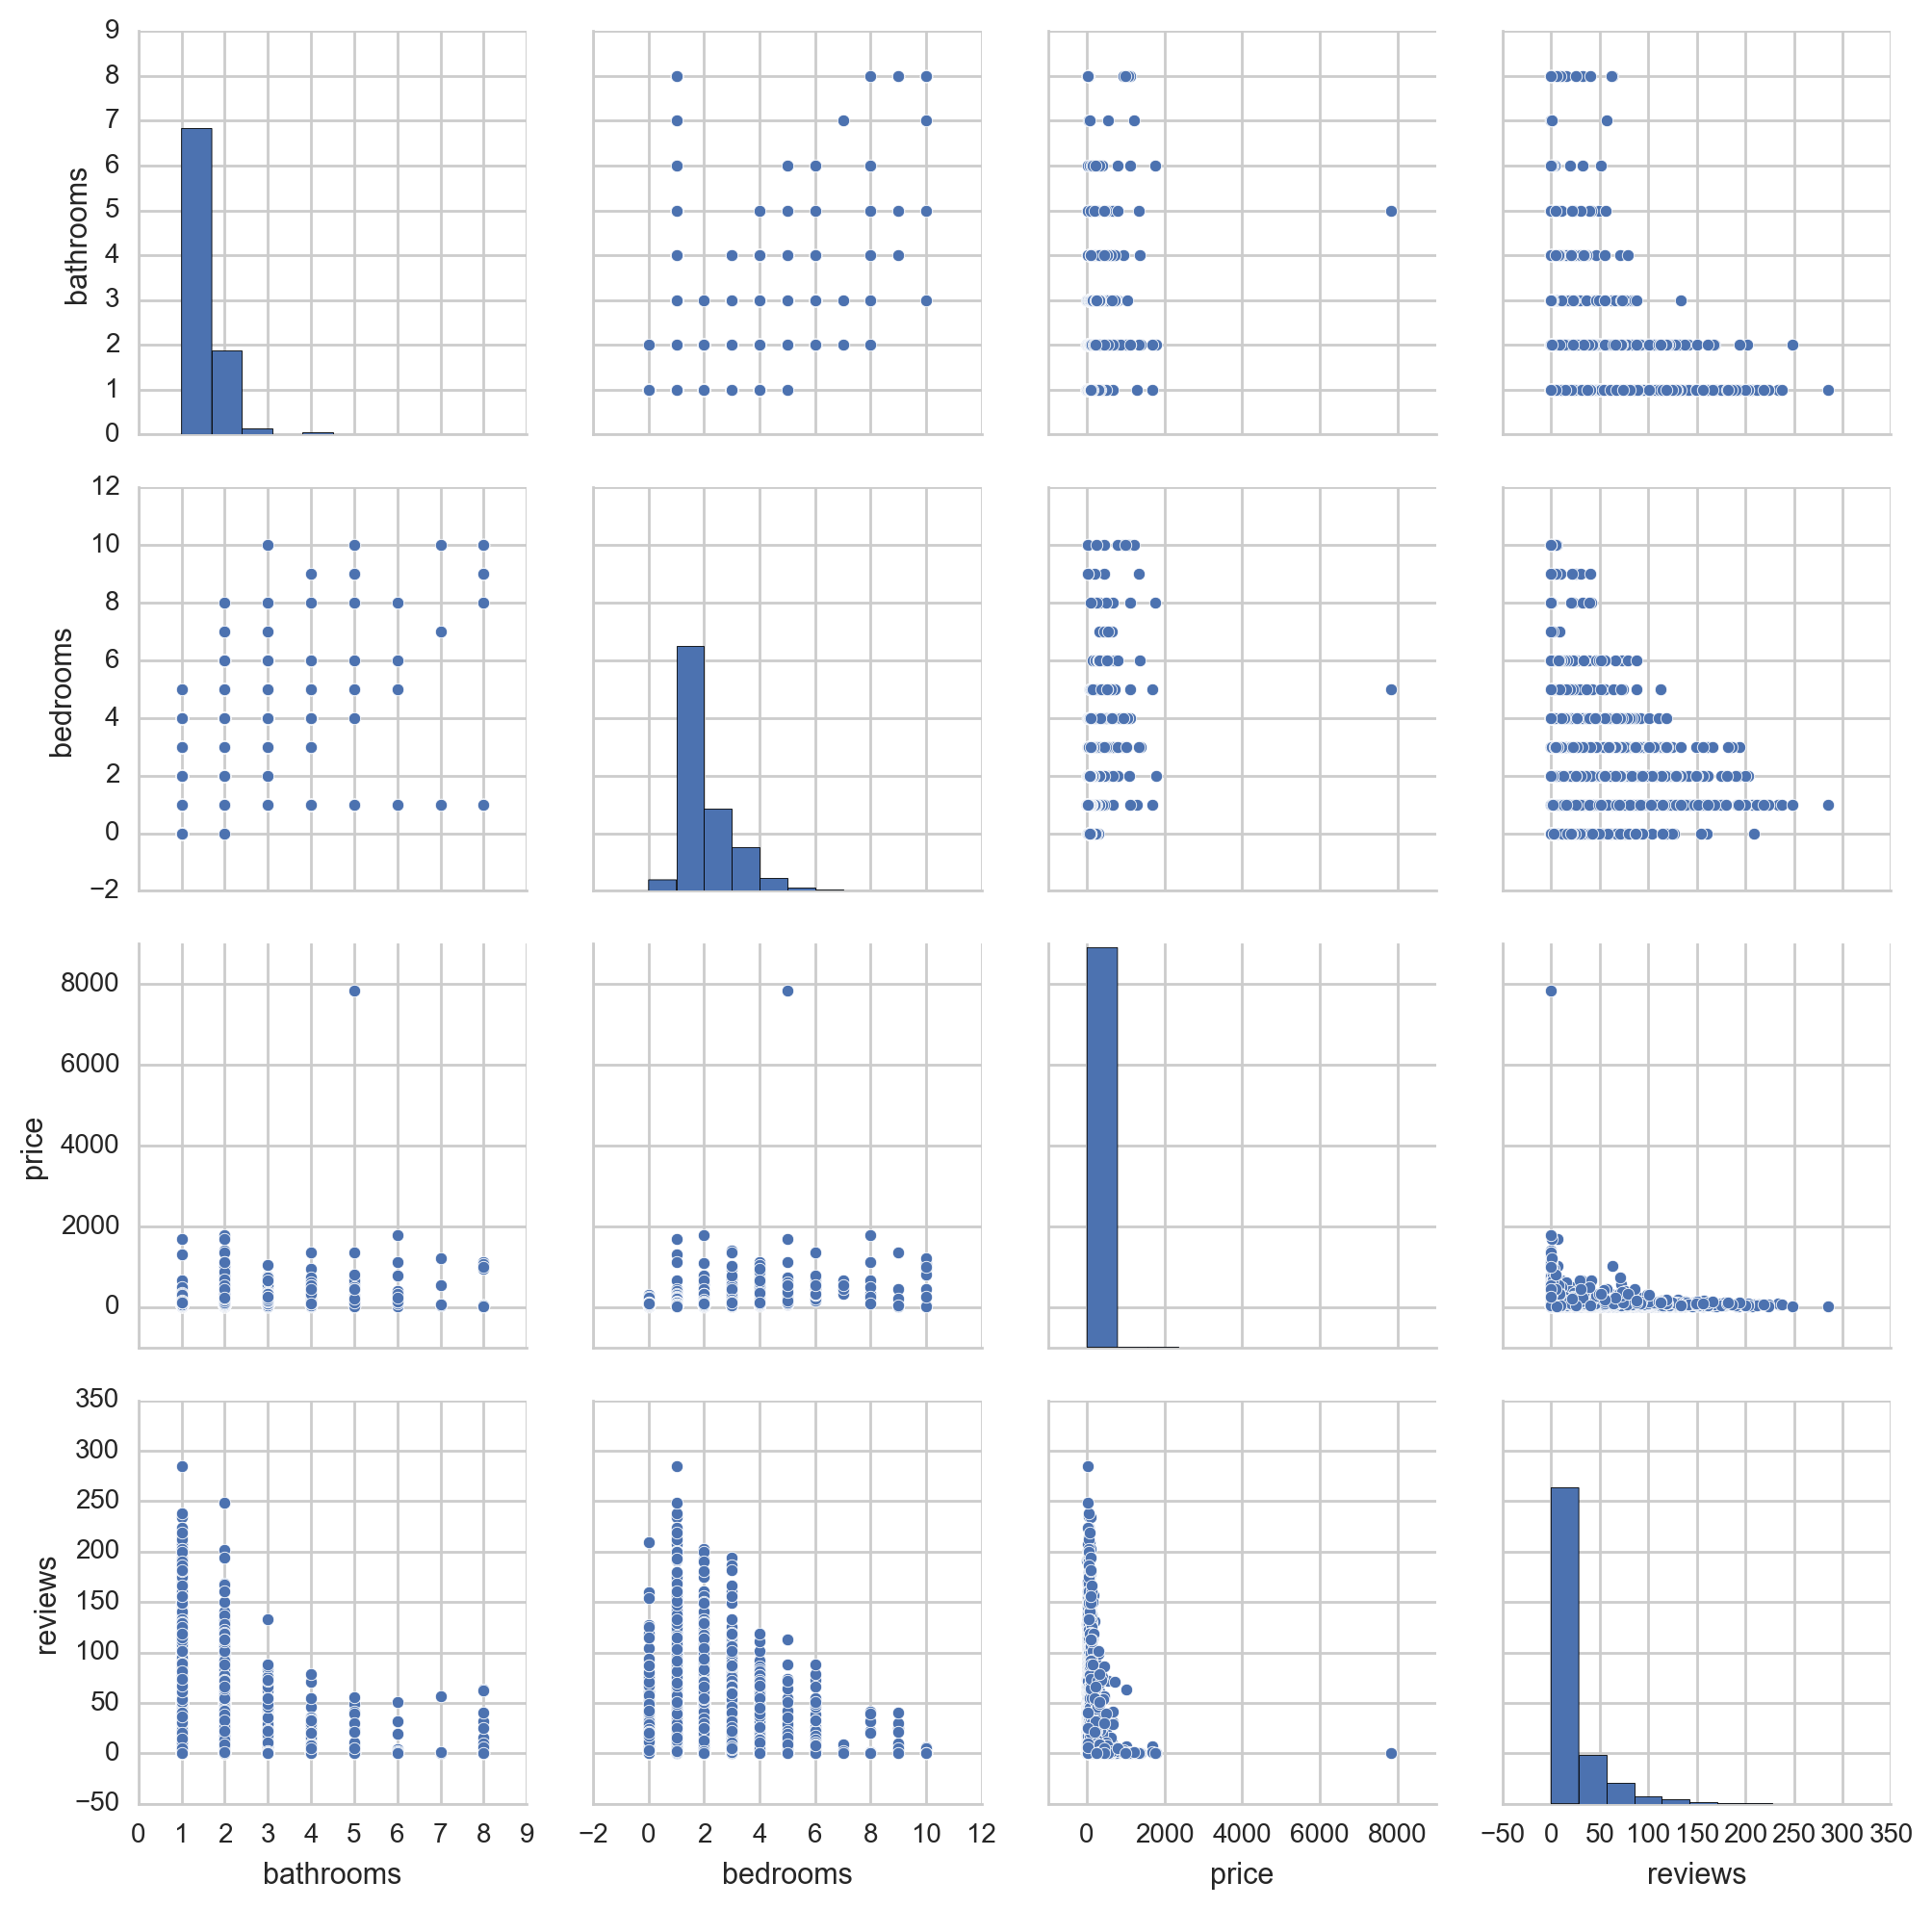

In [626]:
sns.pairplot(barcelona[['neighborhood','room_type','bathrooms','bedrooms','price','reviews']], hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter',
                 diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None,
                 grid_kws=None)

In [627]:
df4_corr = barcelona[['neighborhood','room_type','bathrooms','bedrooms','price','reviews']].corr()

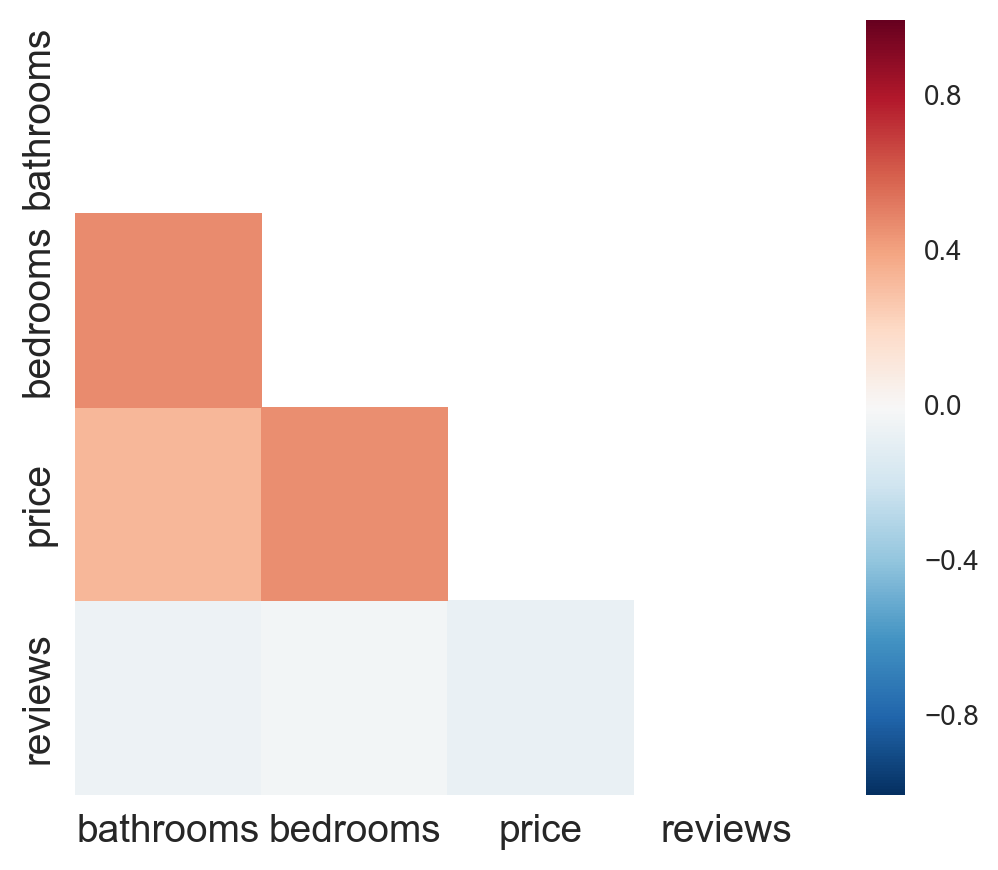

In [628]:
#for heatmap Set the default matplotlib figure size to 7x7:

plt.rcParams['figure.figsize']=(6,5)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df4_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(df4_corr, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

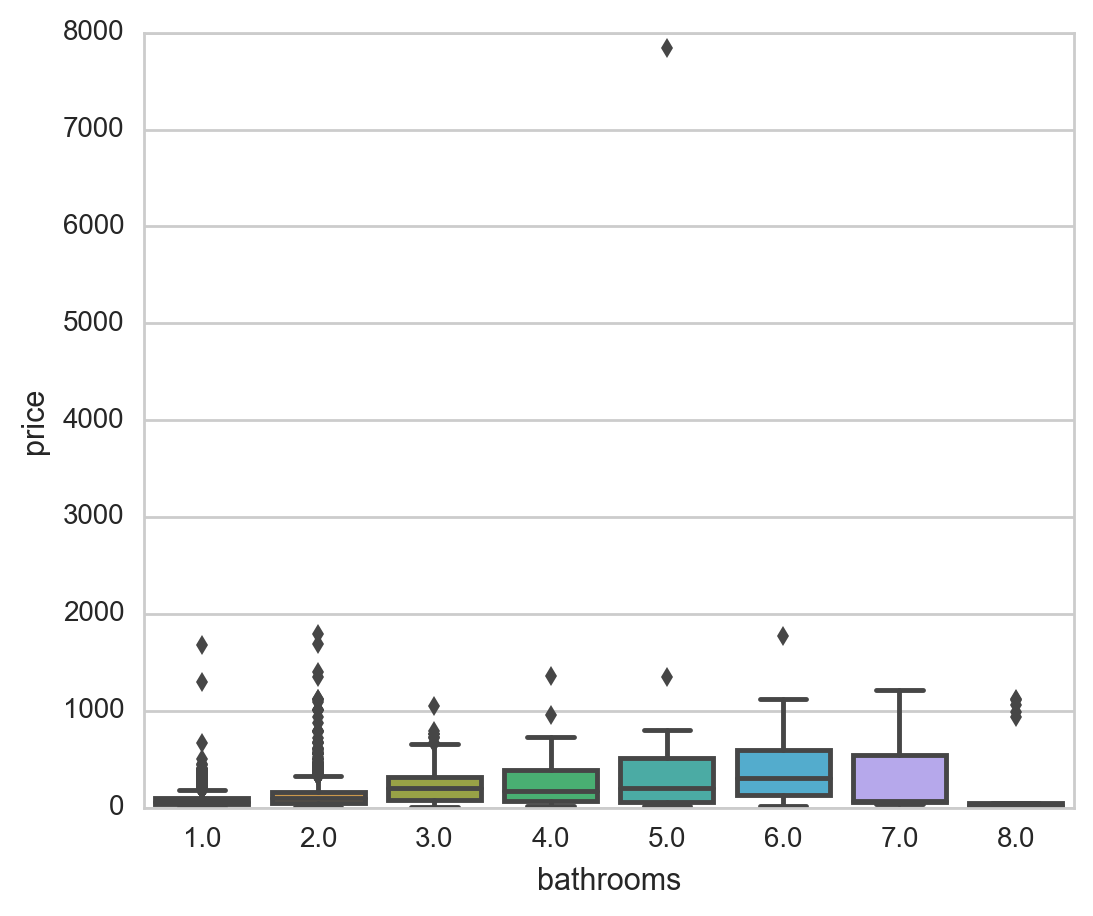

In [629]:
sns.boxplot(x='bathrooms',y='price',data=barcelona)

In [630]:
barcelona.index[barcelona.price == barcelona.price.max()]

Int64Index([13789], dtype='int64')

In [636]:
barcelona.ix[13789,:]

room_id                                    2070410
host_id                                   10561462
room_type                          Entire home/apt
neighborhood                          Ciutat Vella
reviews                                          0
overall_satisfaction                           NaN
accommodates                                   NaN
bedrooms                                         5
bathrooms                                        5
price                                         7837
minstay                                          2
latitude                                   41.3765
longitude                                  2.18788
collected               2015-11-06 12:00:20.768865
Name: 13789, dtype: object

In [637]:
#price in this row index  13789 is 7837, we will drop this row. barcelona.ix[13789,:]

barcelona.drop(barcelona.index[[13789]],inplace=True)

In [638]:
barcelona = barcelona.reset_index()

In [639]:
barcelona.shape

(13899, 15)

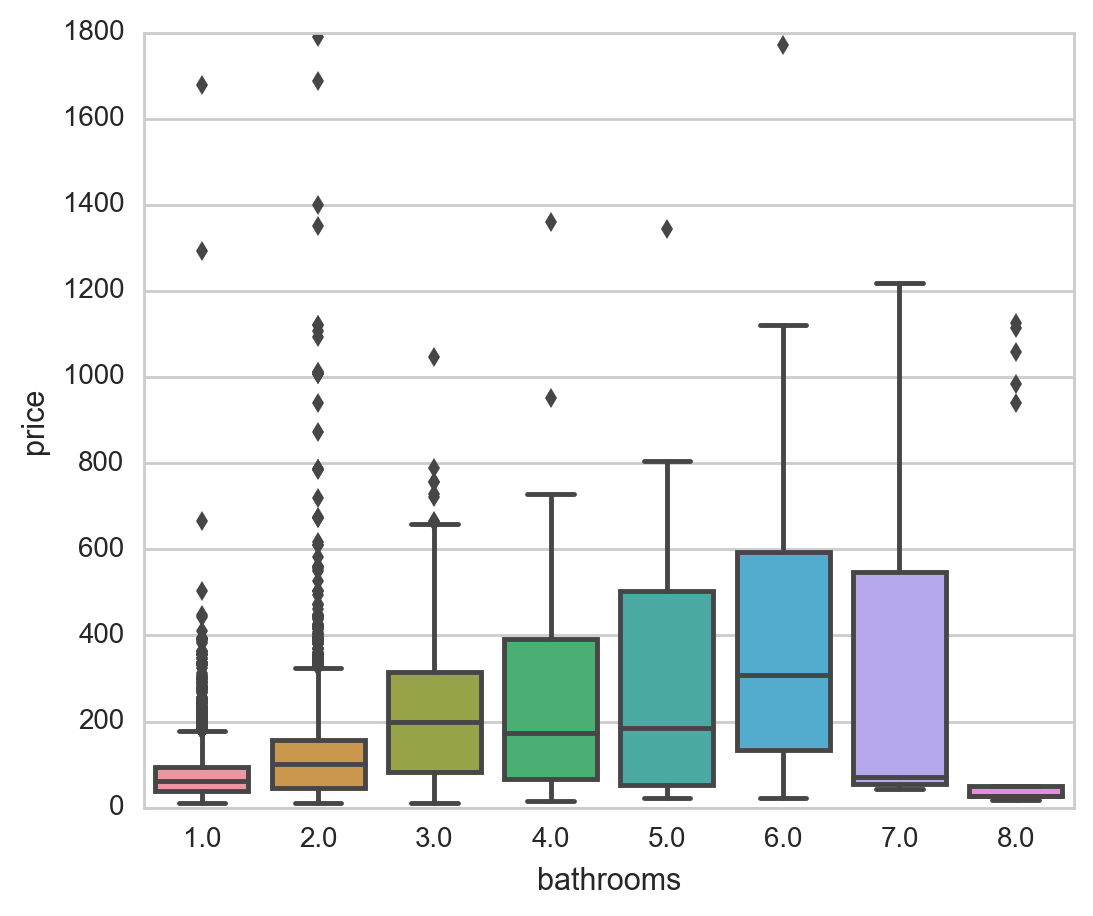

In [640]:
sns.boxplot(x='bathrooms',y='price',data=barcelona)

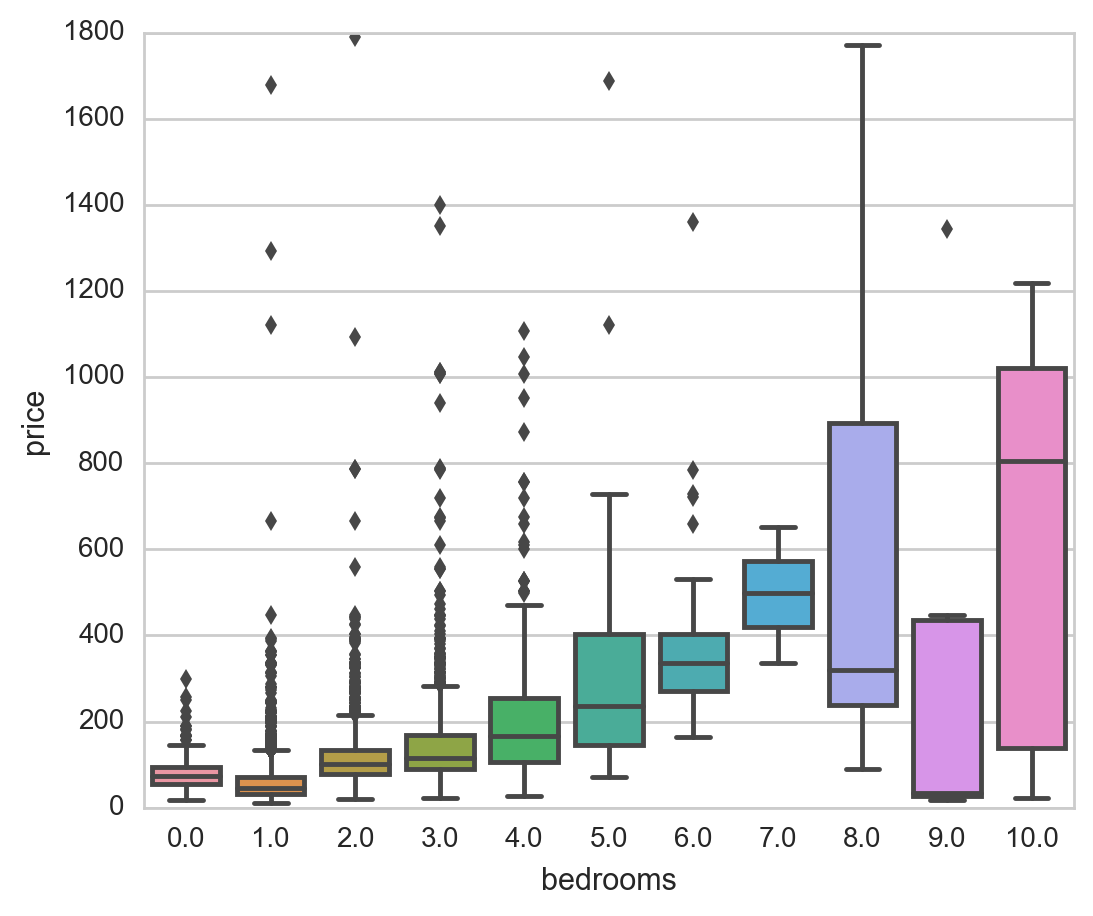

In [641]:
sns.boxplot(x='bedrooms',y='price',data=barcelona, orient='v',)